In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from scipy.special import expit

from PIL import Image

In [3]:
f = open('lfwcrop_grey/lists/01_test_diff.txt')
l = []
for line in f:
    l.extend(line.rstrip().split(' '))

In [4]:
im_list = [Image.open('lfwcrop_grey/faces/'+l[i]+'.pgm') for i in range(len(l))]
data = [np.array(im) for im in im_list]

In [12]:
X = np.reshape(data, (600, 4096))

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
print("hi")

hi


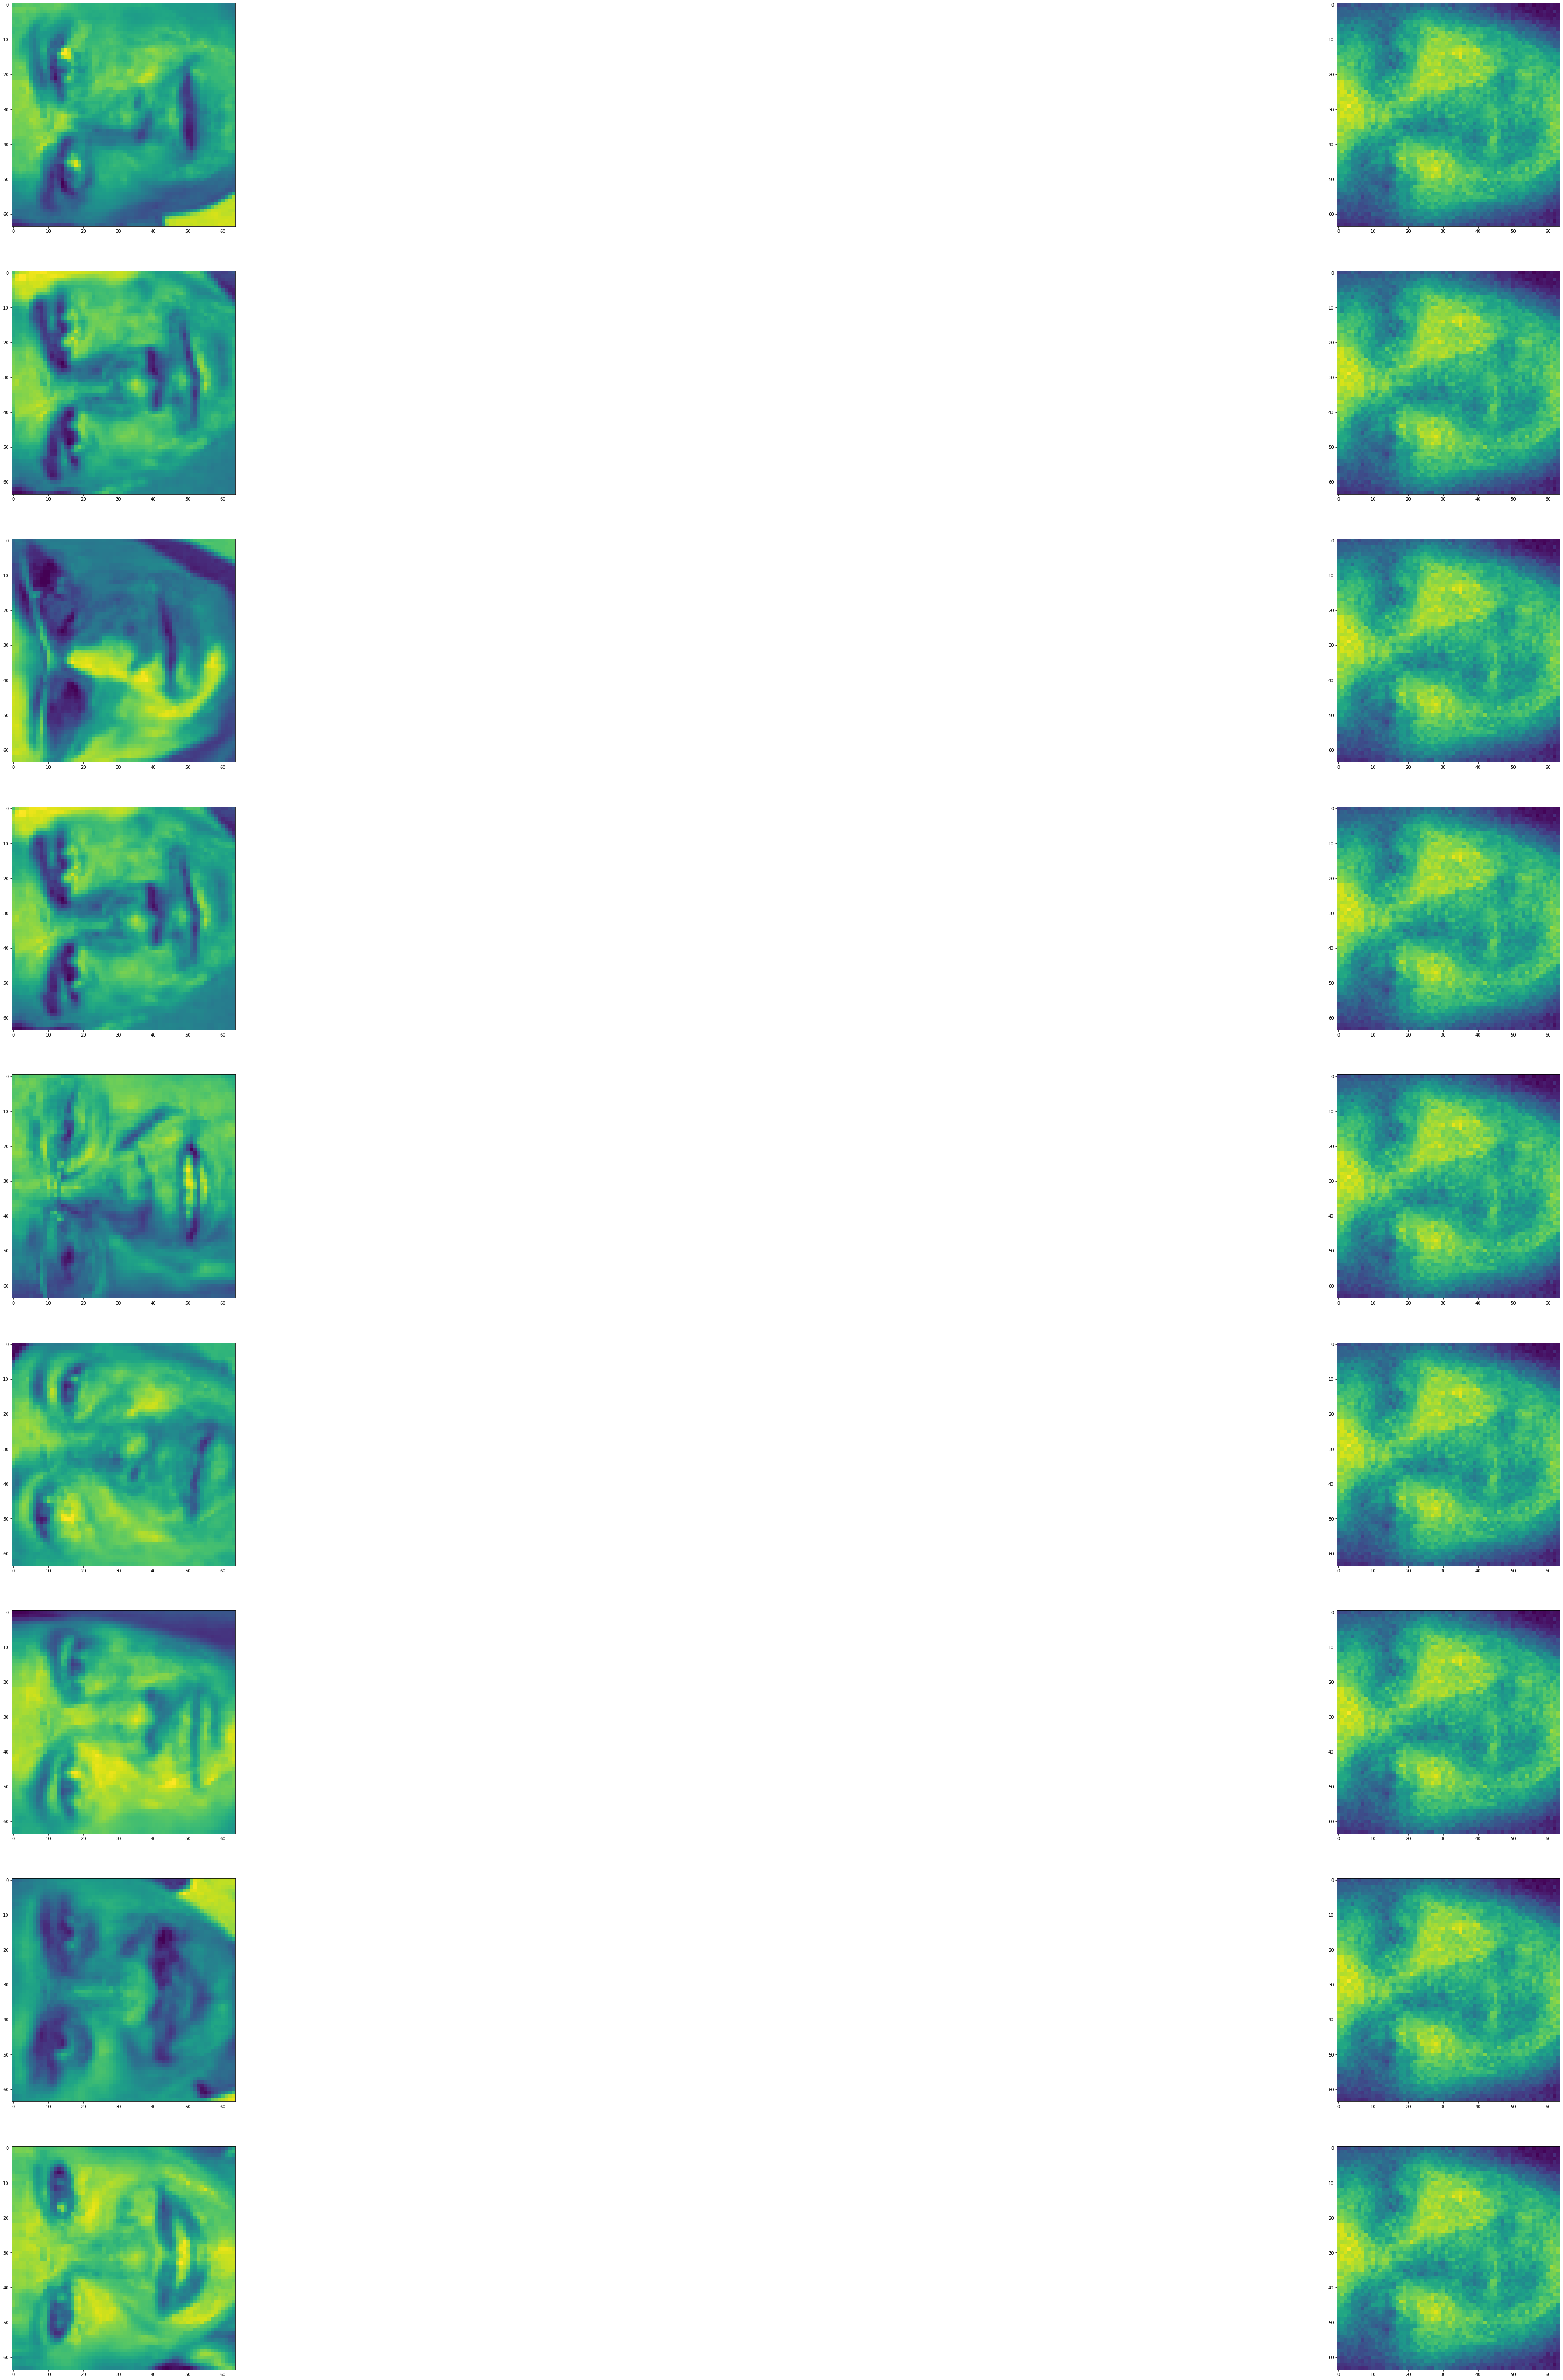

In [16]:
rbm = BernoulliRBM(learning_rate=0.05,n_iter=750,n_components=1000)
rbm.fit(X[:400])
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_

rbm2 = BernoulliRBM(learning_rate=0.05,n_iter=750,n_components=1500)
rbm2.fit(X[:400])
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_

rbm3 = BernoulliRBM(learning_rate=0.05,n_iter=750,n_components=2000)
rbm3.fit(X[:400])
hidden_biases3 = rbm3.intercept_hidden_
visible_biases3 = rbm3.intercept_visible_
weights3 = rbm3.components_

fig, ax = plt.subplots(9, 2, figsize=(100,100))
j=0

for i in [1,2,3,4,5,400,401,402,403]:
    img = np.reshape(X[i].copy(), (64,64)).T
    V0 = np.reshape(X[i], 4096)
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    PHiV02 = expit(weights2.dot(PH0Vi)+hidden_biases2)
    PH0Vi2 = expit(weights2.T.dot(PHiV02)+visible_biases2)
    PHiV03 = expit(weights3.dot(PH0Vi2)+hidden_biases3)
    PH0Vi3 = expit(weights3.T.dot(PHiV03)+visible_biases3)
    ax[j][0].imshow(np.reshape(X[i],(64,64)).T)
    ax[j][1].imshow(np.reshape(PH0Vi3,(64,64)).T)
    j=j+1

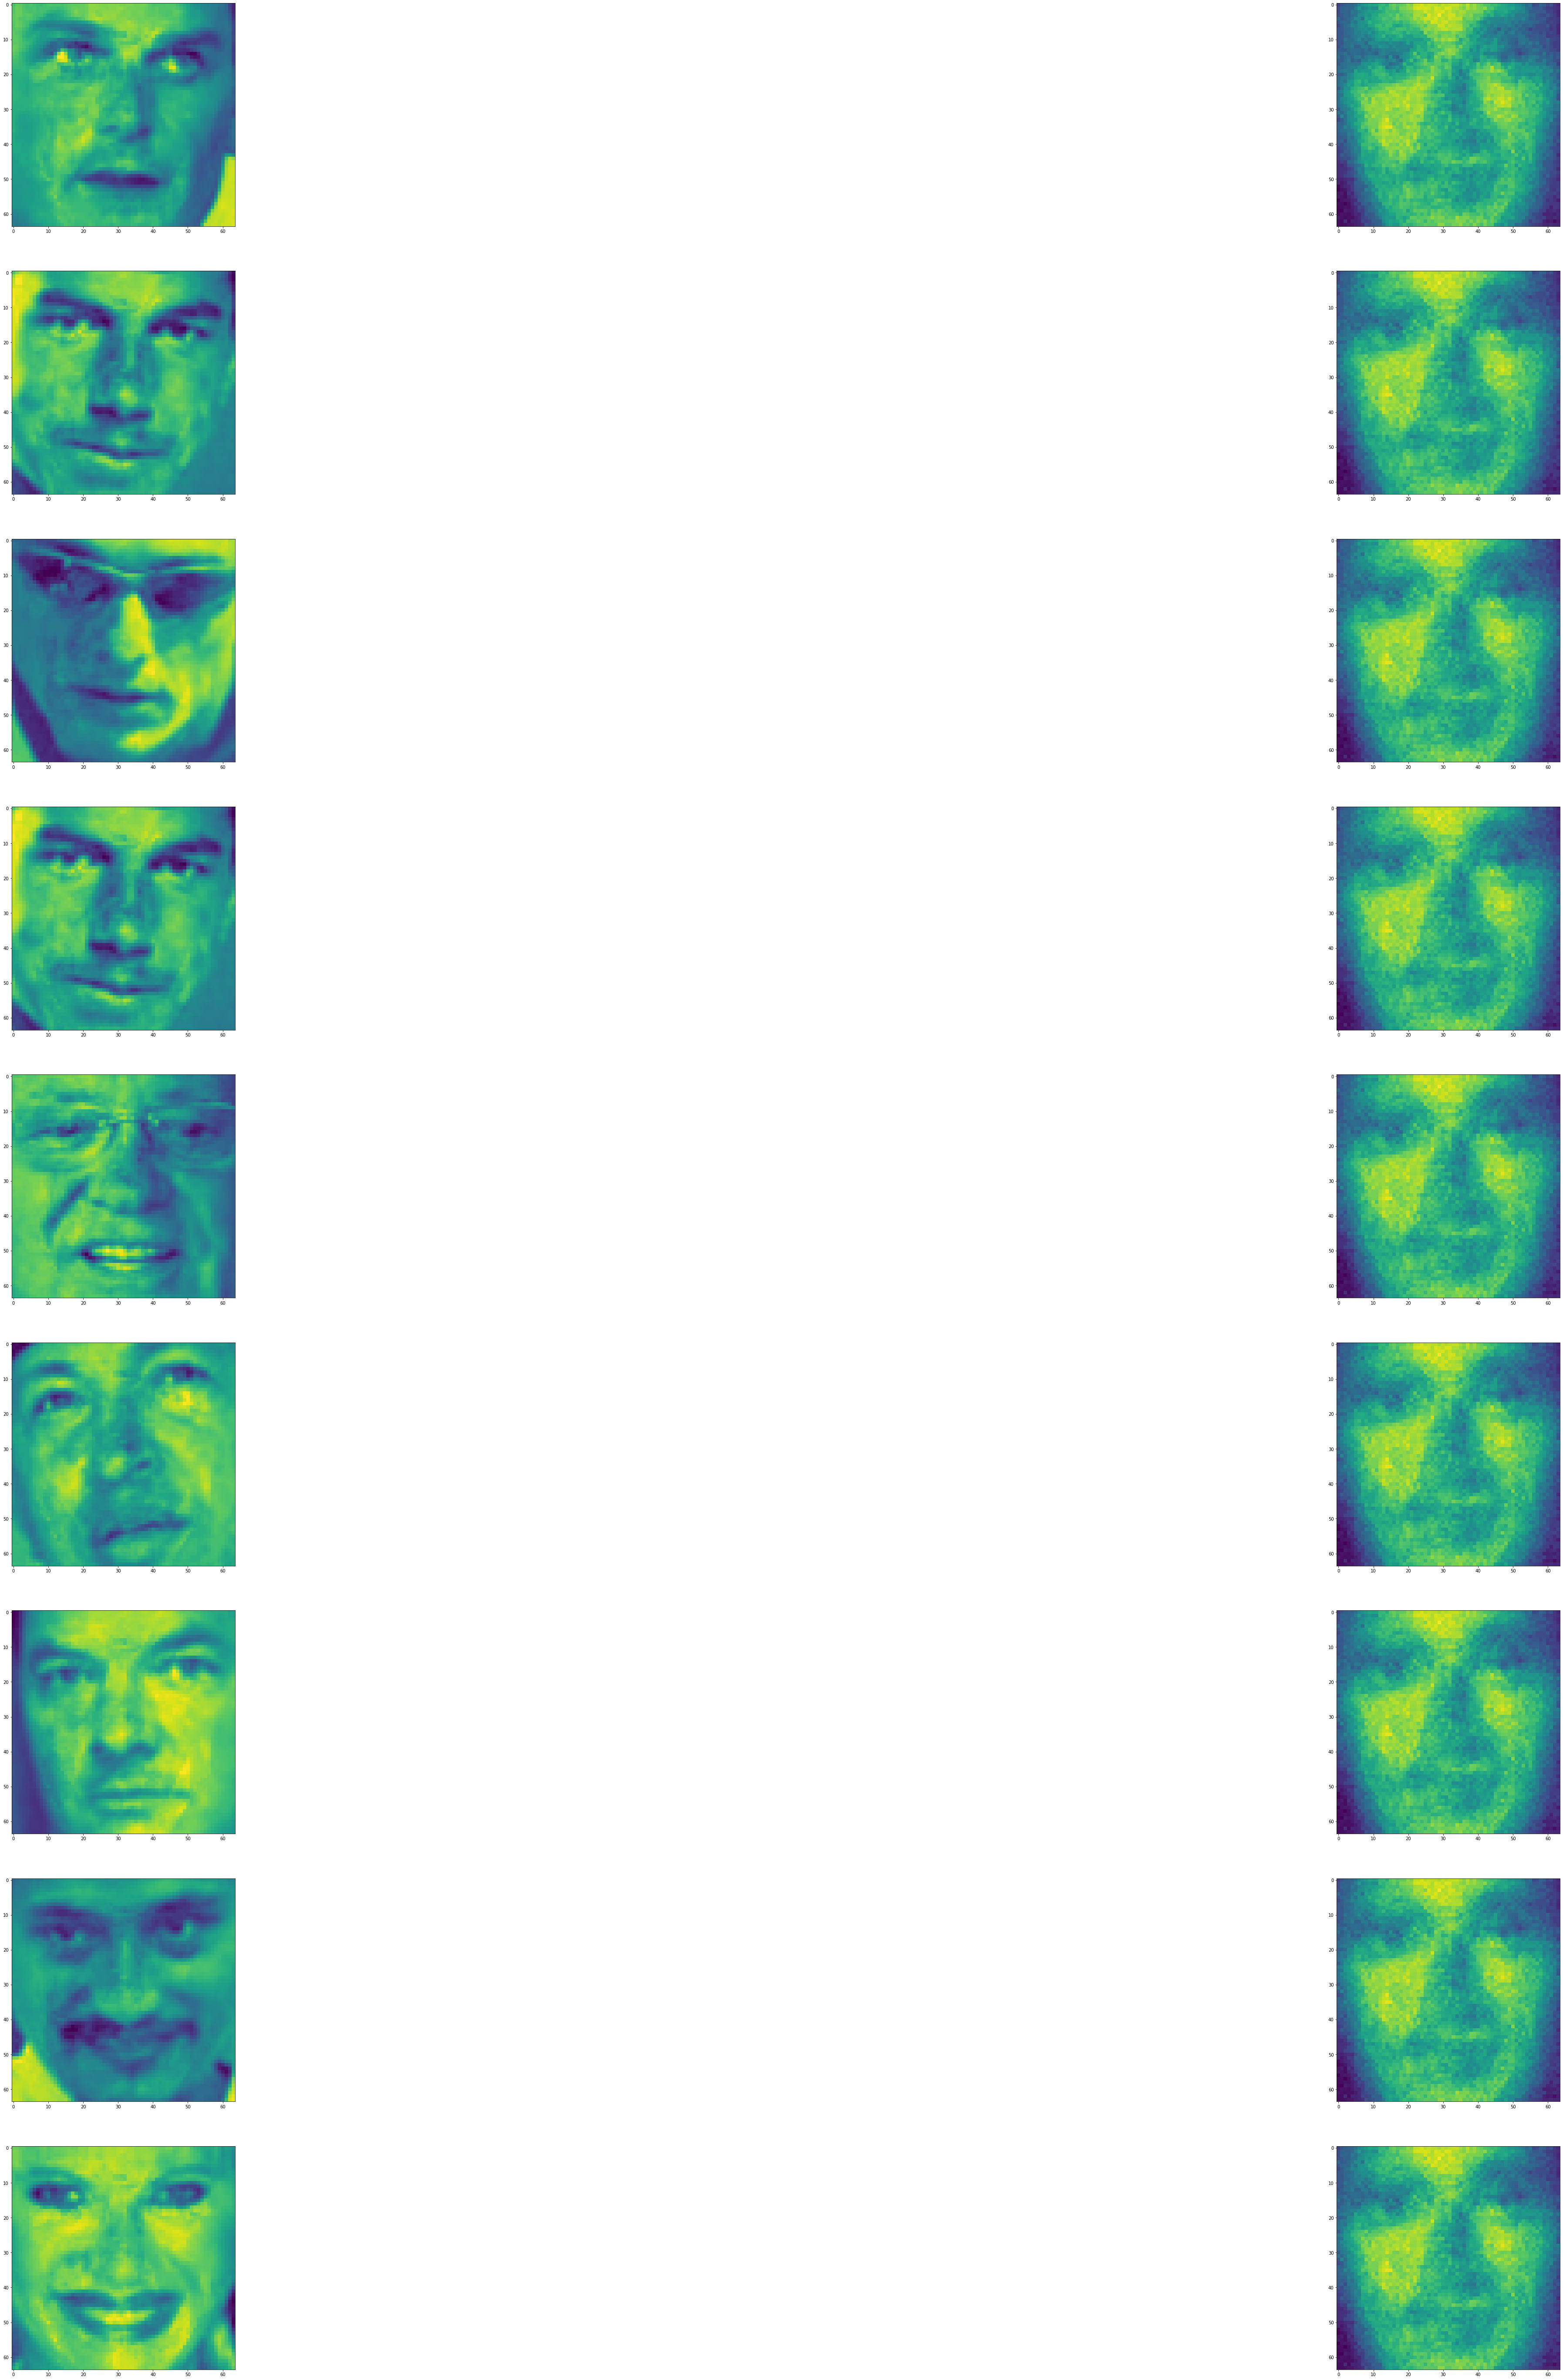

In [19]:
fig, ax = plt.subplots(9, 2, figsize=(100,100))
j=0
for i in [1,2,3,4,5,400,401,402,403]:
    img = np.reshape(X[i].copy(), (64,64)).T
    V0 = np.reshape(X[i], 4096)
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    PHiV02 = expit(weights2.dot(PH0Vi)+hidden_biases2)
    PH0Vi2 = expit(weights2.T.dot(PHiV02)+visible_biases2)
    PHiV03 = expit(weights3.dot(PH0Vi2)+hidden_biases3)
    PH0Vi3 = expit(weights3.T.dot(PHiV03)+visible_biases3)
    ax[j][0].imshow(np.reshape(X[i],(64,64)))
    ax[j][1].imshow(np.reshape(PH0Vi3,(64,64)))
    j=j+1

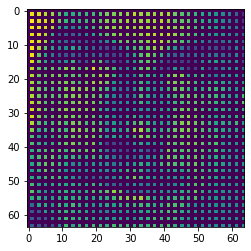

In [35]:
weird_img = np.reshape(X[2].copy(), (64,64))
for i in range(64):
    for j in range(64):
        if j%2 == 0:
            weird_img[i][j] = 0
        elif i%2 == 0:
            weird_img[i][j] = 0
plt.imshow(weird_img)


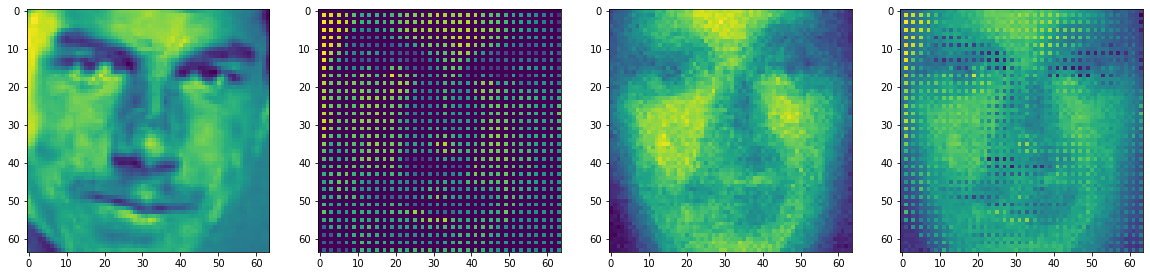

In [37]:
fig,ax = plt.subplots(1,4, figsize=(20,20))

img = weird_img
V0 = np.reshape(X[2], 4096)
PHiV0 = expit(weights.dot(V0) + hidden_biases)
PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
PHiV02 = expit(weights2.dot(PH0Vi)+hidden_biases2)
PH0Vi2 = expit(weights2.T.dot(PHiV02)+visible_biases2)
PHiV03 = expit(weights3.dot(PH0Vi2)+hidden_biases3)
PH0Vi3 = expit(weights3.T.dot(PHiV03)+visible_biases3)
ax[0].imshow(np.reshape(X[2],(64,64)))
ax[1].imshow(weird_img)
ax[2].imshow(np.reshape(PH0Vi3,(64,64)))
j=j+1

weird_img2 = weird_img.copy()
for i in range(64):
    for j in range(64):
        if j%2 == 0:
            weird_img2[i][j] = np.reshape(PH0Vi3, (64,64))[i][j]
        elif i%2 == 0:
            weird_img2[i][j] = np.reshape(PH0Vi3, (64,64))[i][j]
ax[3].imshow(weird_img2)

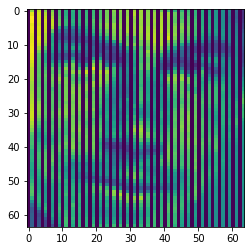

In [39]:
weird_img = np.reshape(X[2].copy(), (64,64))
for i in range(64):
    for j in range(64):
        if j%2 == 0:
            weird_img[i][j] = 0
plt.imshow(weird_img)

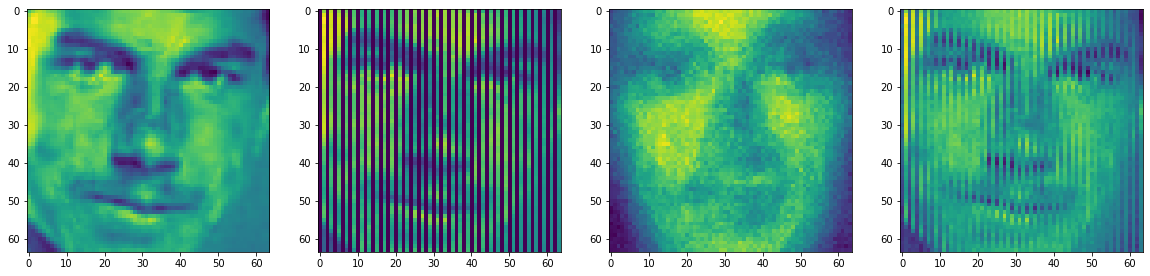

In [41]:
fig,ax = plt.subplots(1,4, figsize=(20,20))

img = weird_img
V0 = np.reshape(X[2], 4096)
PHiV0 = expit(weights.dot(V0) + hidden_biases)
PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
PHiV02 = expit(weights2.dot(PH0Vi)+hidden_biases2)
PH0Vi2 = expit(weights2.T.dot(PHiV02)+visible_biases2)
PHiV03 = expit(weights3.dot(PH0Vi2)+hidden_biases3)
PH0Vi3 = expit(weights3.T.dot(PHiV03)+visible_biases3)
ax[0].imshow(np.reshape(X[2],(64,64)))
ax[1].imshow(weird_img)
ax[2].imshow(np.reshape(PH0Vi3,(64,64)))
j=j+1

weird_img2 = weird_img.copy()
for i in range(64):
    for j in range(64):
        if j%2 == 0:
            weird_img2[i][j] = np.reshape(PH0Vi3, (64,64))[i][j]
ax[3].imshow(weird_img2)

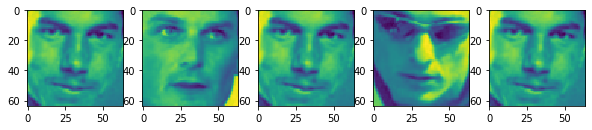

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(10,10))
ax[0].imshow(X[0])
ax[1].imshow(X[1])
ax[2].imshow(X[2])
ax[3].imshow(X[3])
ax[4].imshow(X[4])

In [7]:
X = [np.reshape(x, 4096) for x in X]

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
iterations = range(10)
components = 100
rate = 0.1
test_indexes = [1, 2, 3, 4, 5]

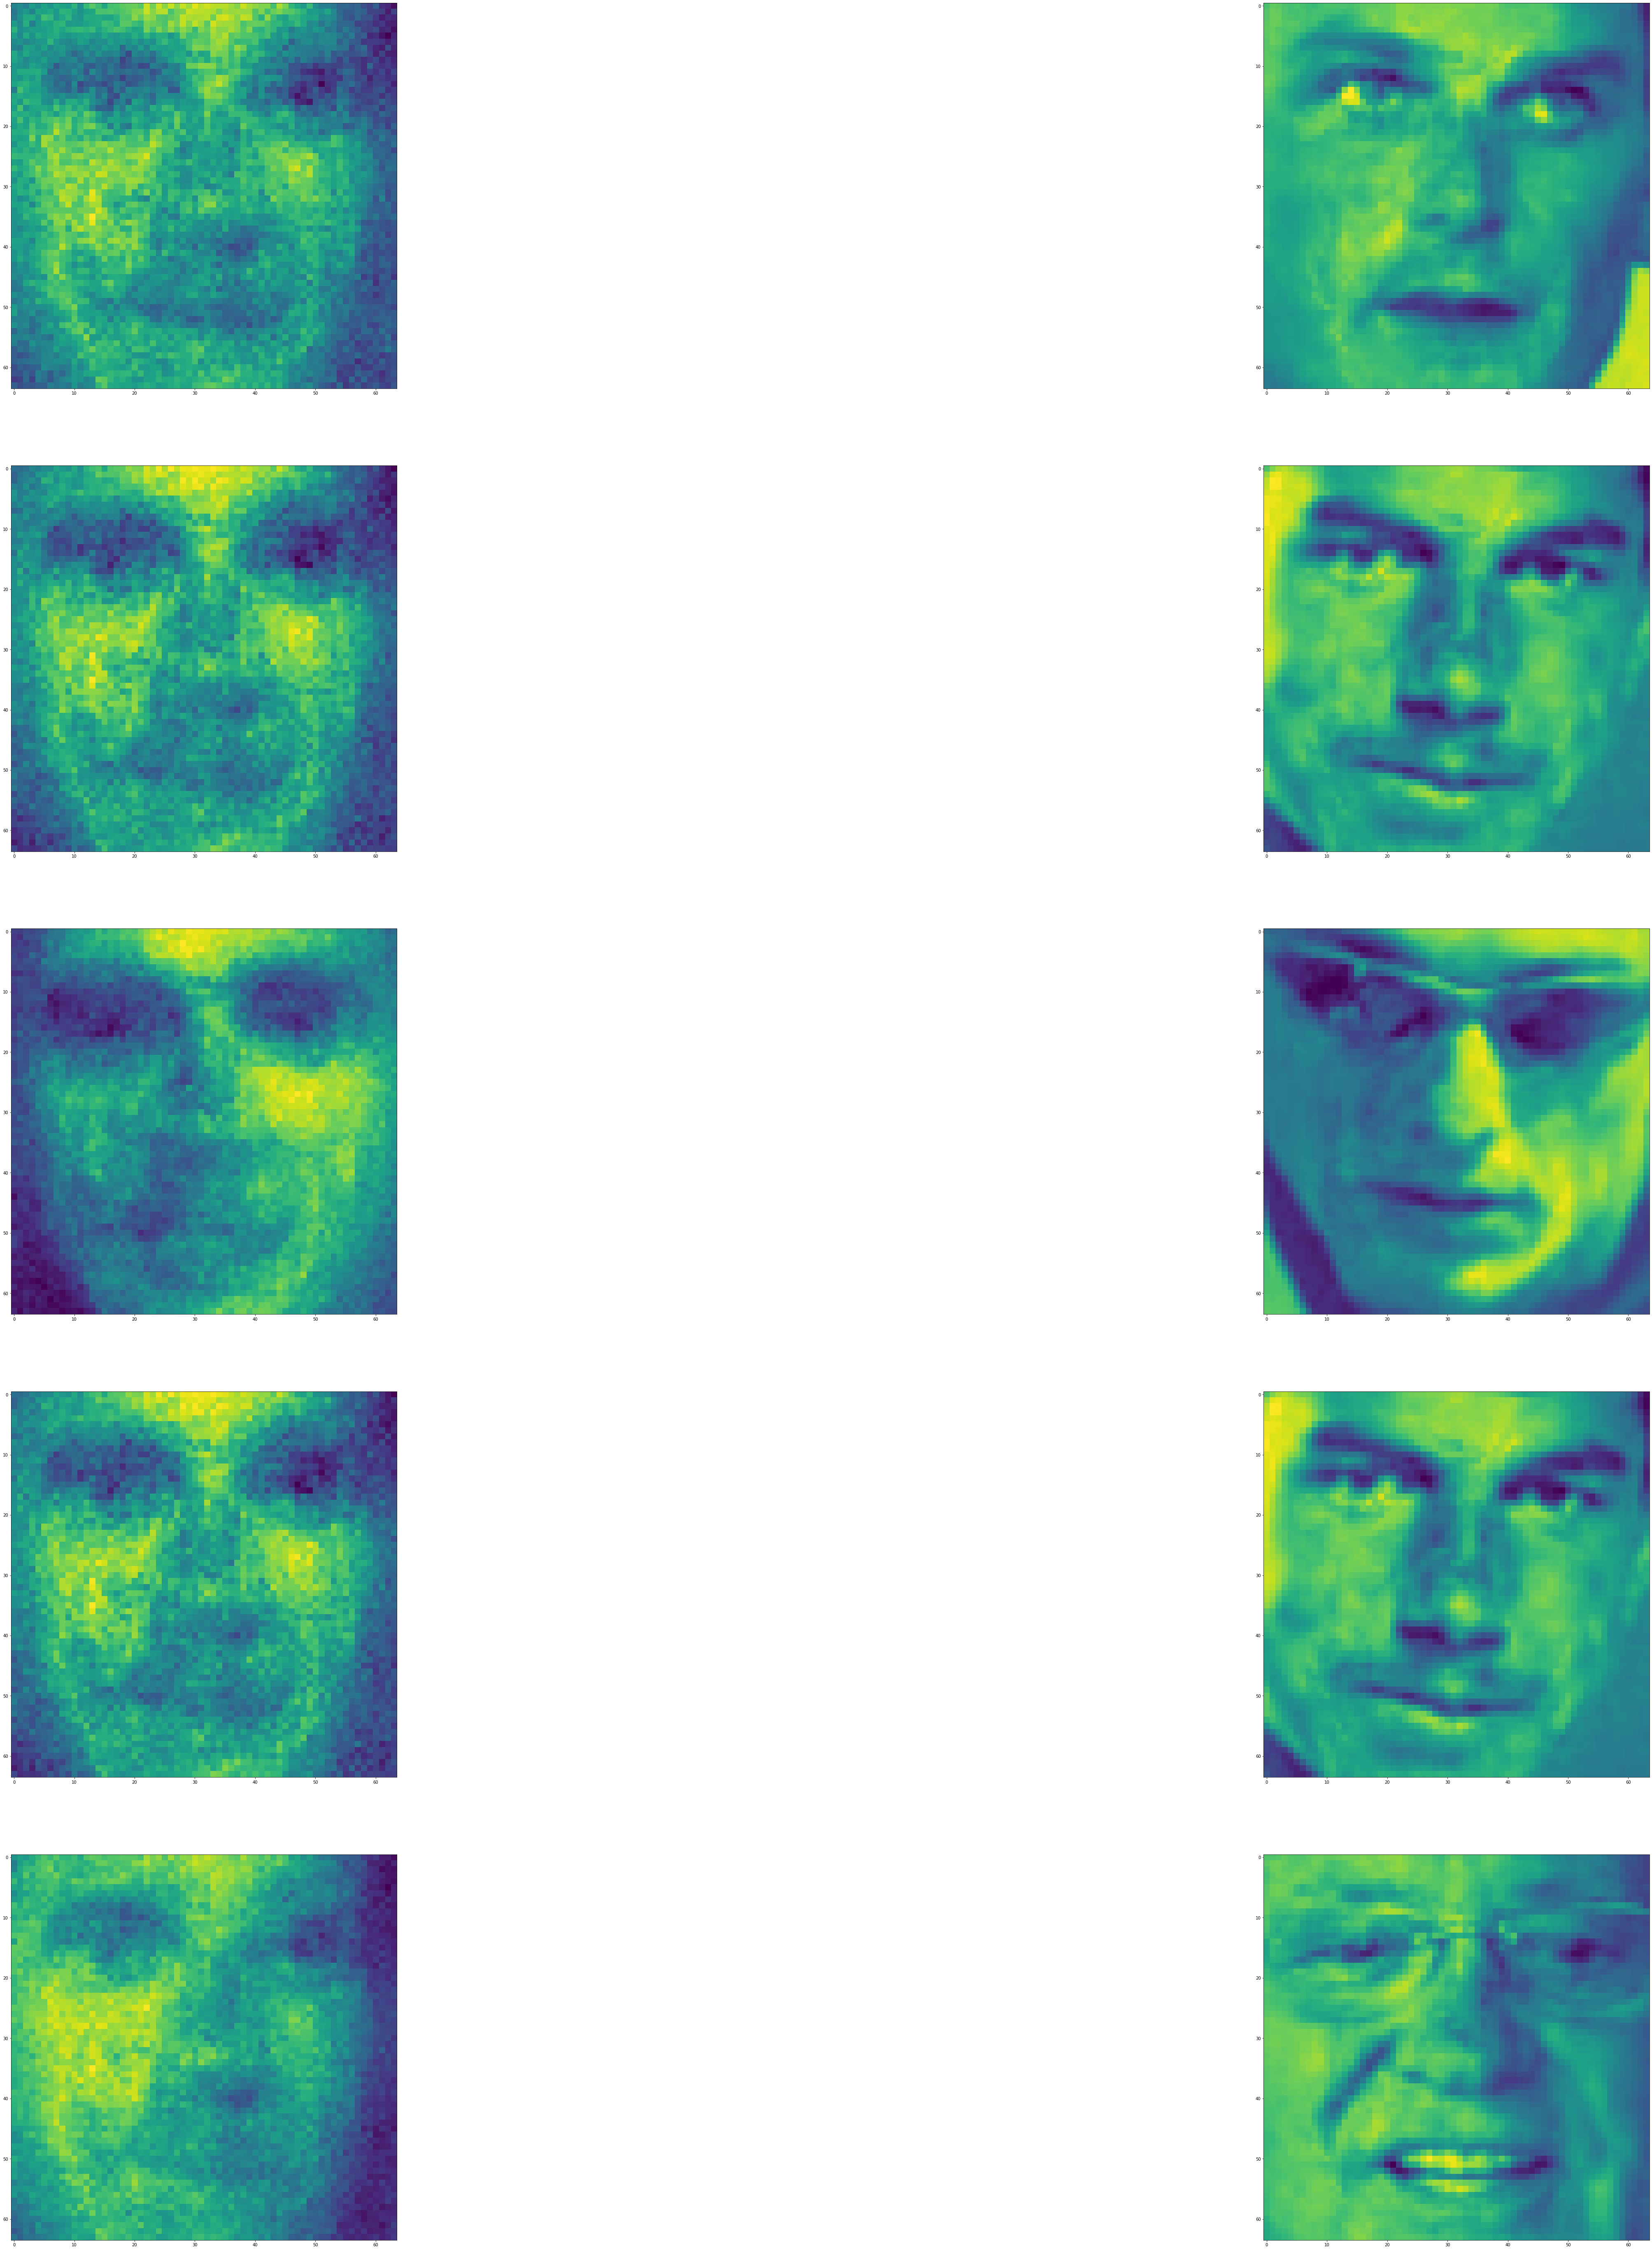

In [31]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.06,n_iter=120,n_components=1000)
rbm.fit(X[:100])
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_
j=0
for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind], (64,64)))
    j = j + 1

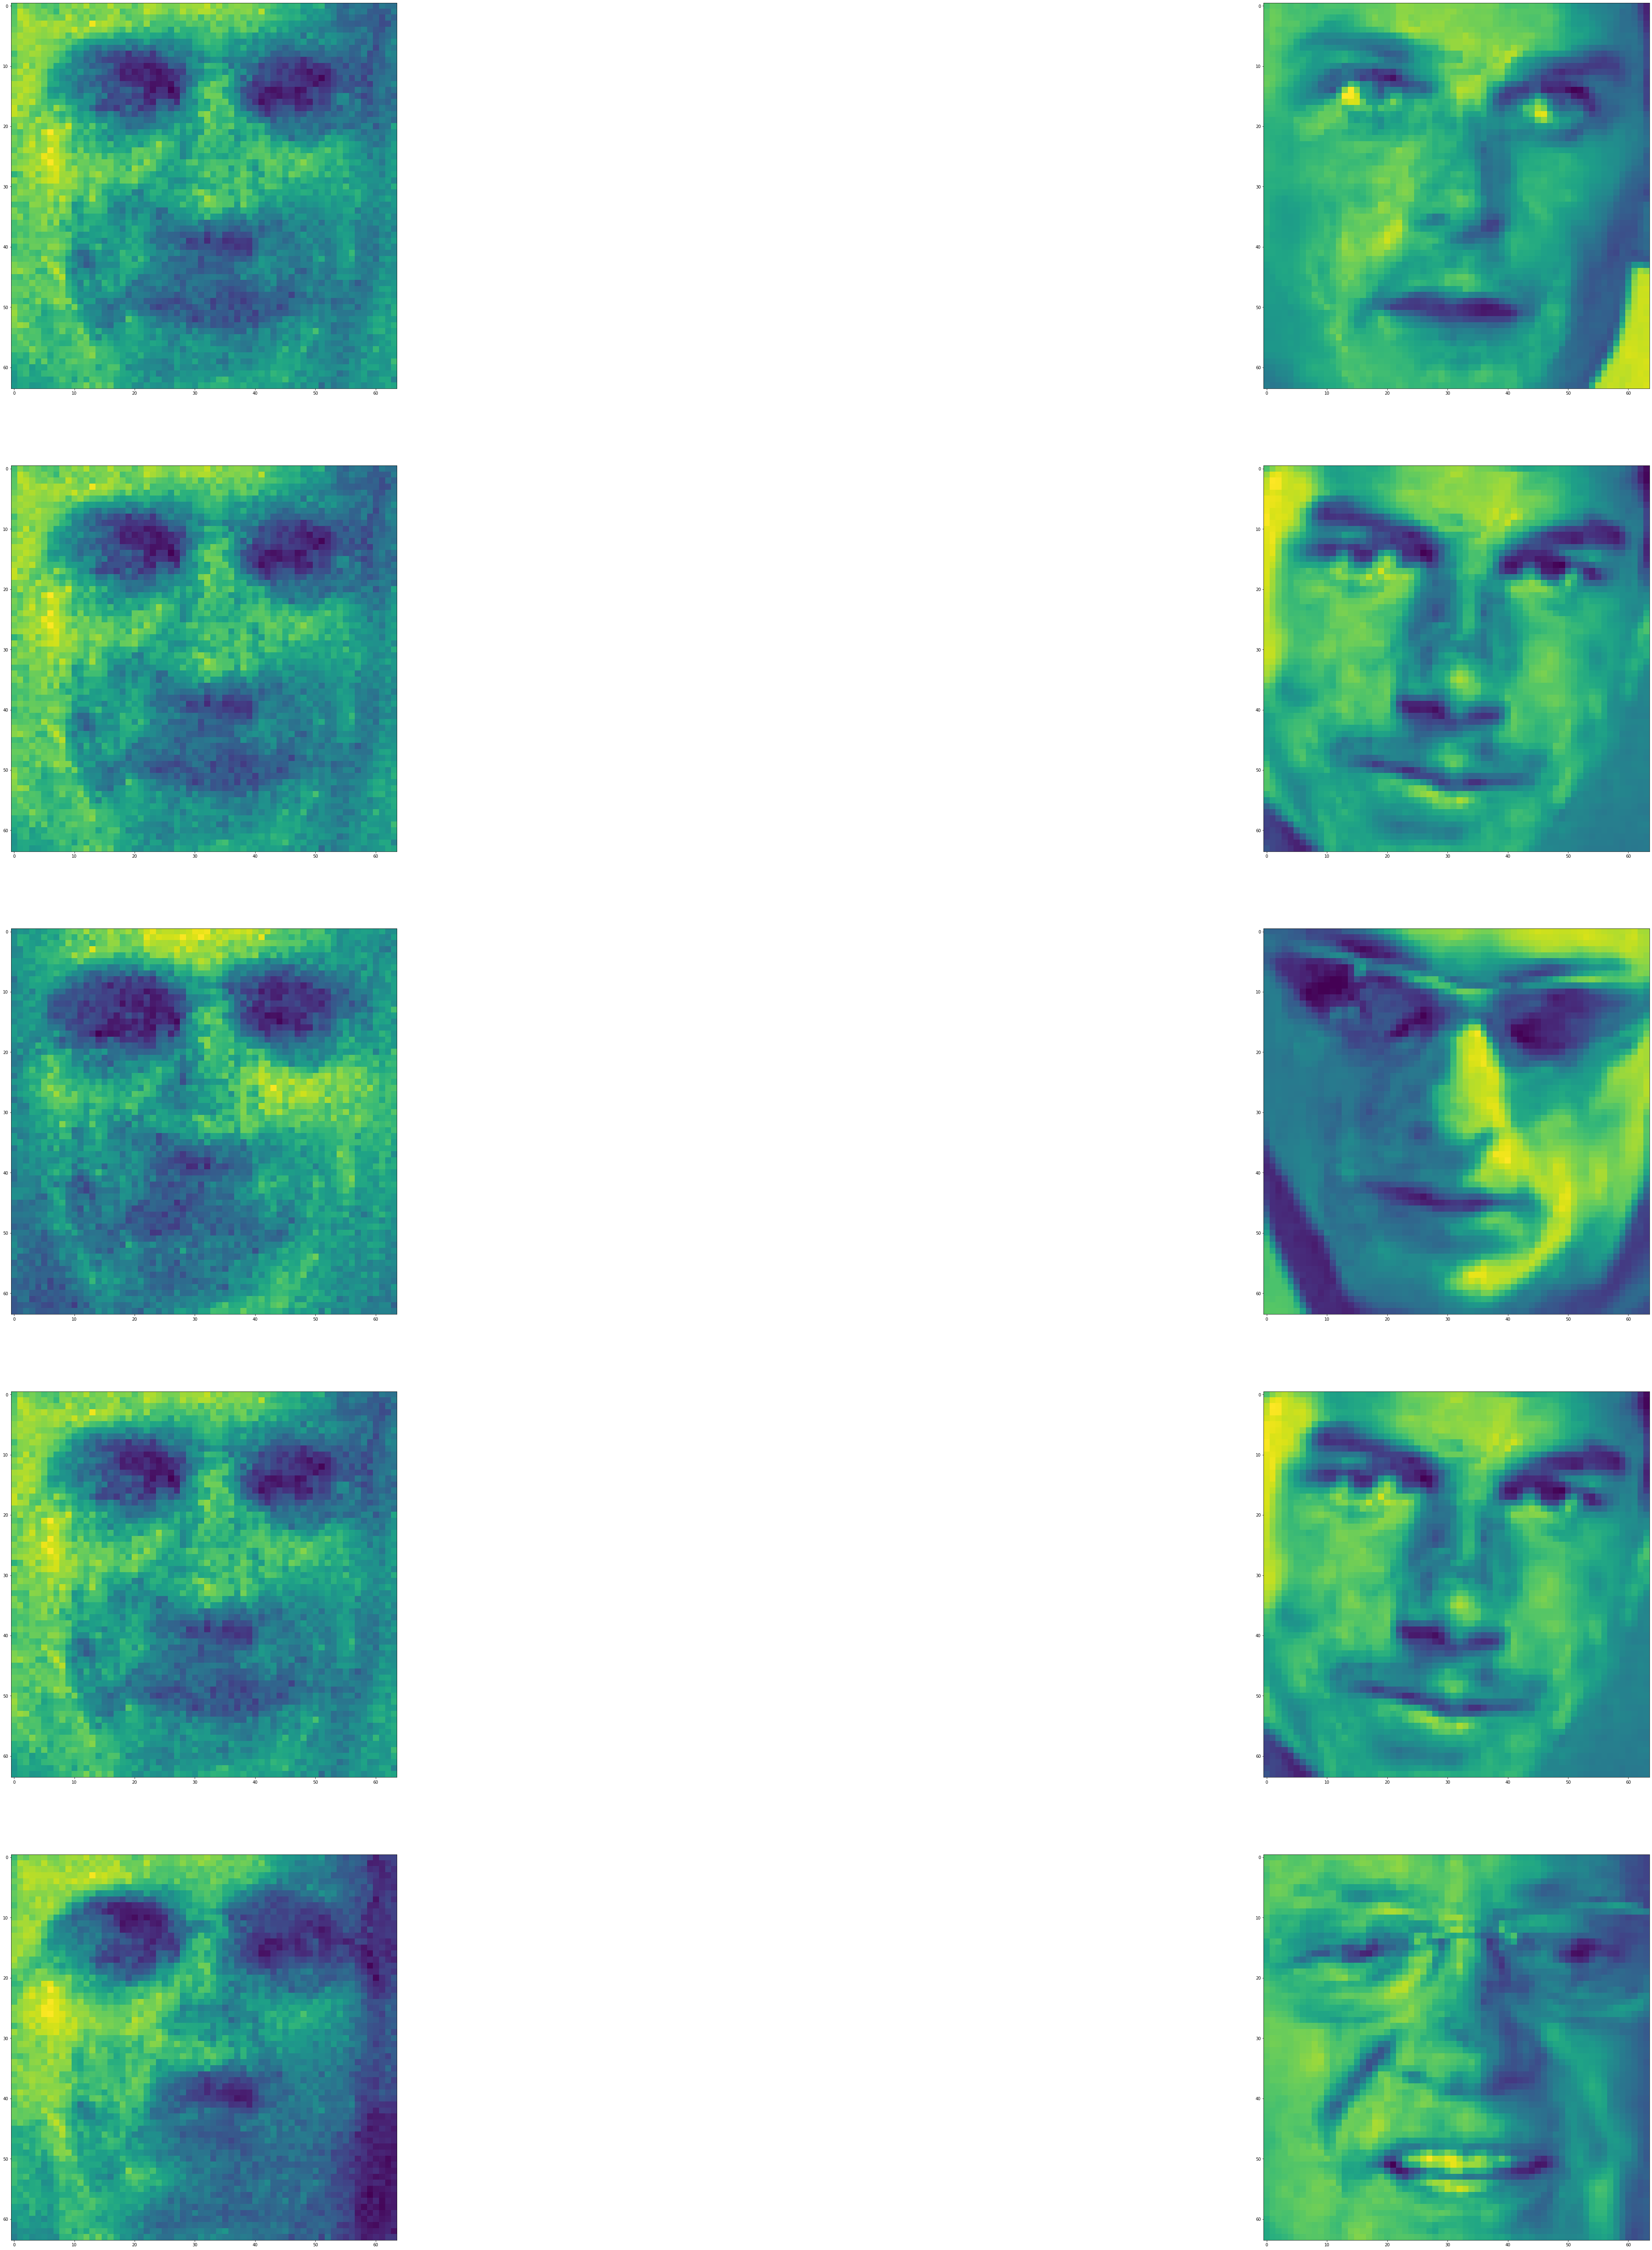

In [47]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.06,n_iter=500,n_components=1000)
rbm.fit(X[:100])
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_
j=0
for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind], (64,64)))
    j = j + 1

ValueError: shapes (4096,1500) and (1000,) not aligned: 1500 (dim 1) != 1000 (dim 0)

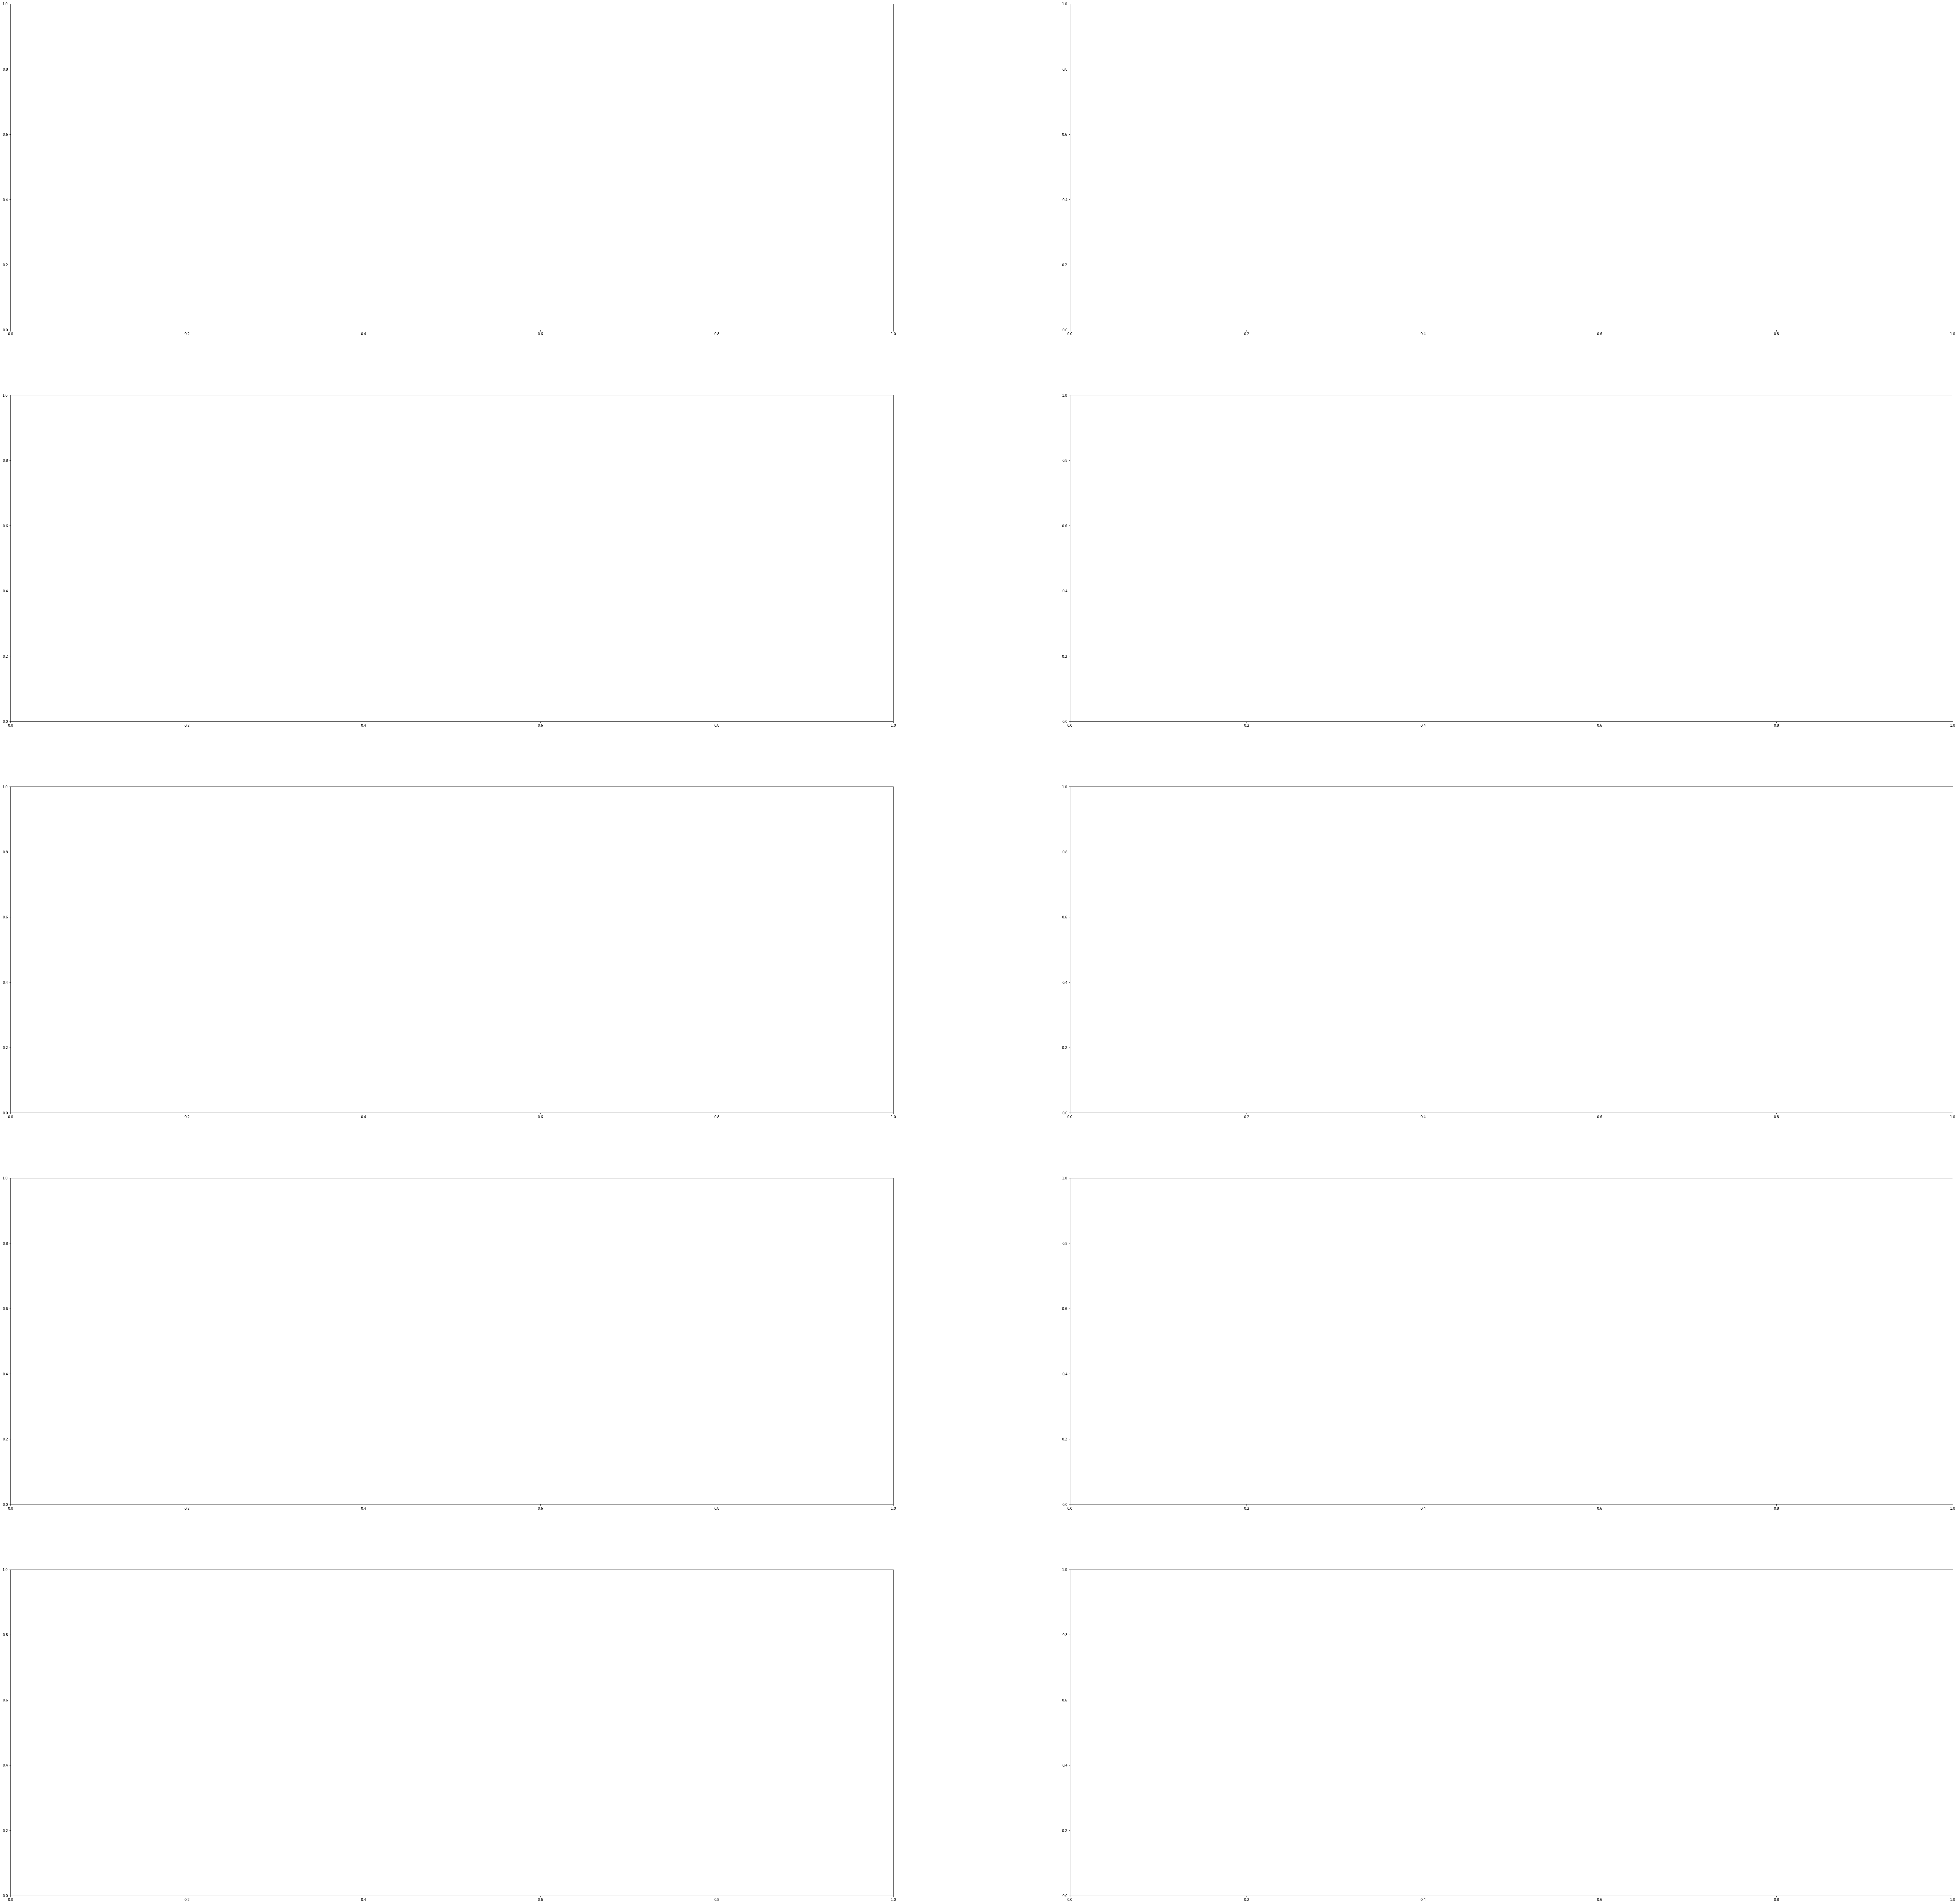

In [48]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm2 = BernoulliRBM(learning_rate=0.06,n_iter=500,n_components=1500)
rbm2.fit(X[:100])
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_
j=0
for ind in test_indexes:
    V0 = X[ind]
    PHiV02 = expit(weights2.dot(V0) + hidden_biases2)
    PH0Vi2 = expit(weights2.T.dot(PHiV0) + visible_biases2)
    ax[j][0].imshow(np.reshape(PH0Vi2,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind], (64,64)))
    j = j + 1

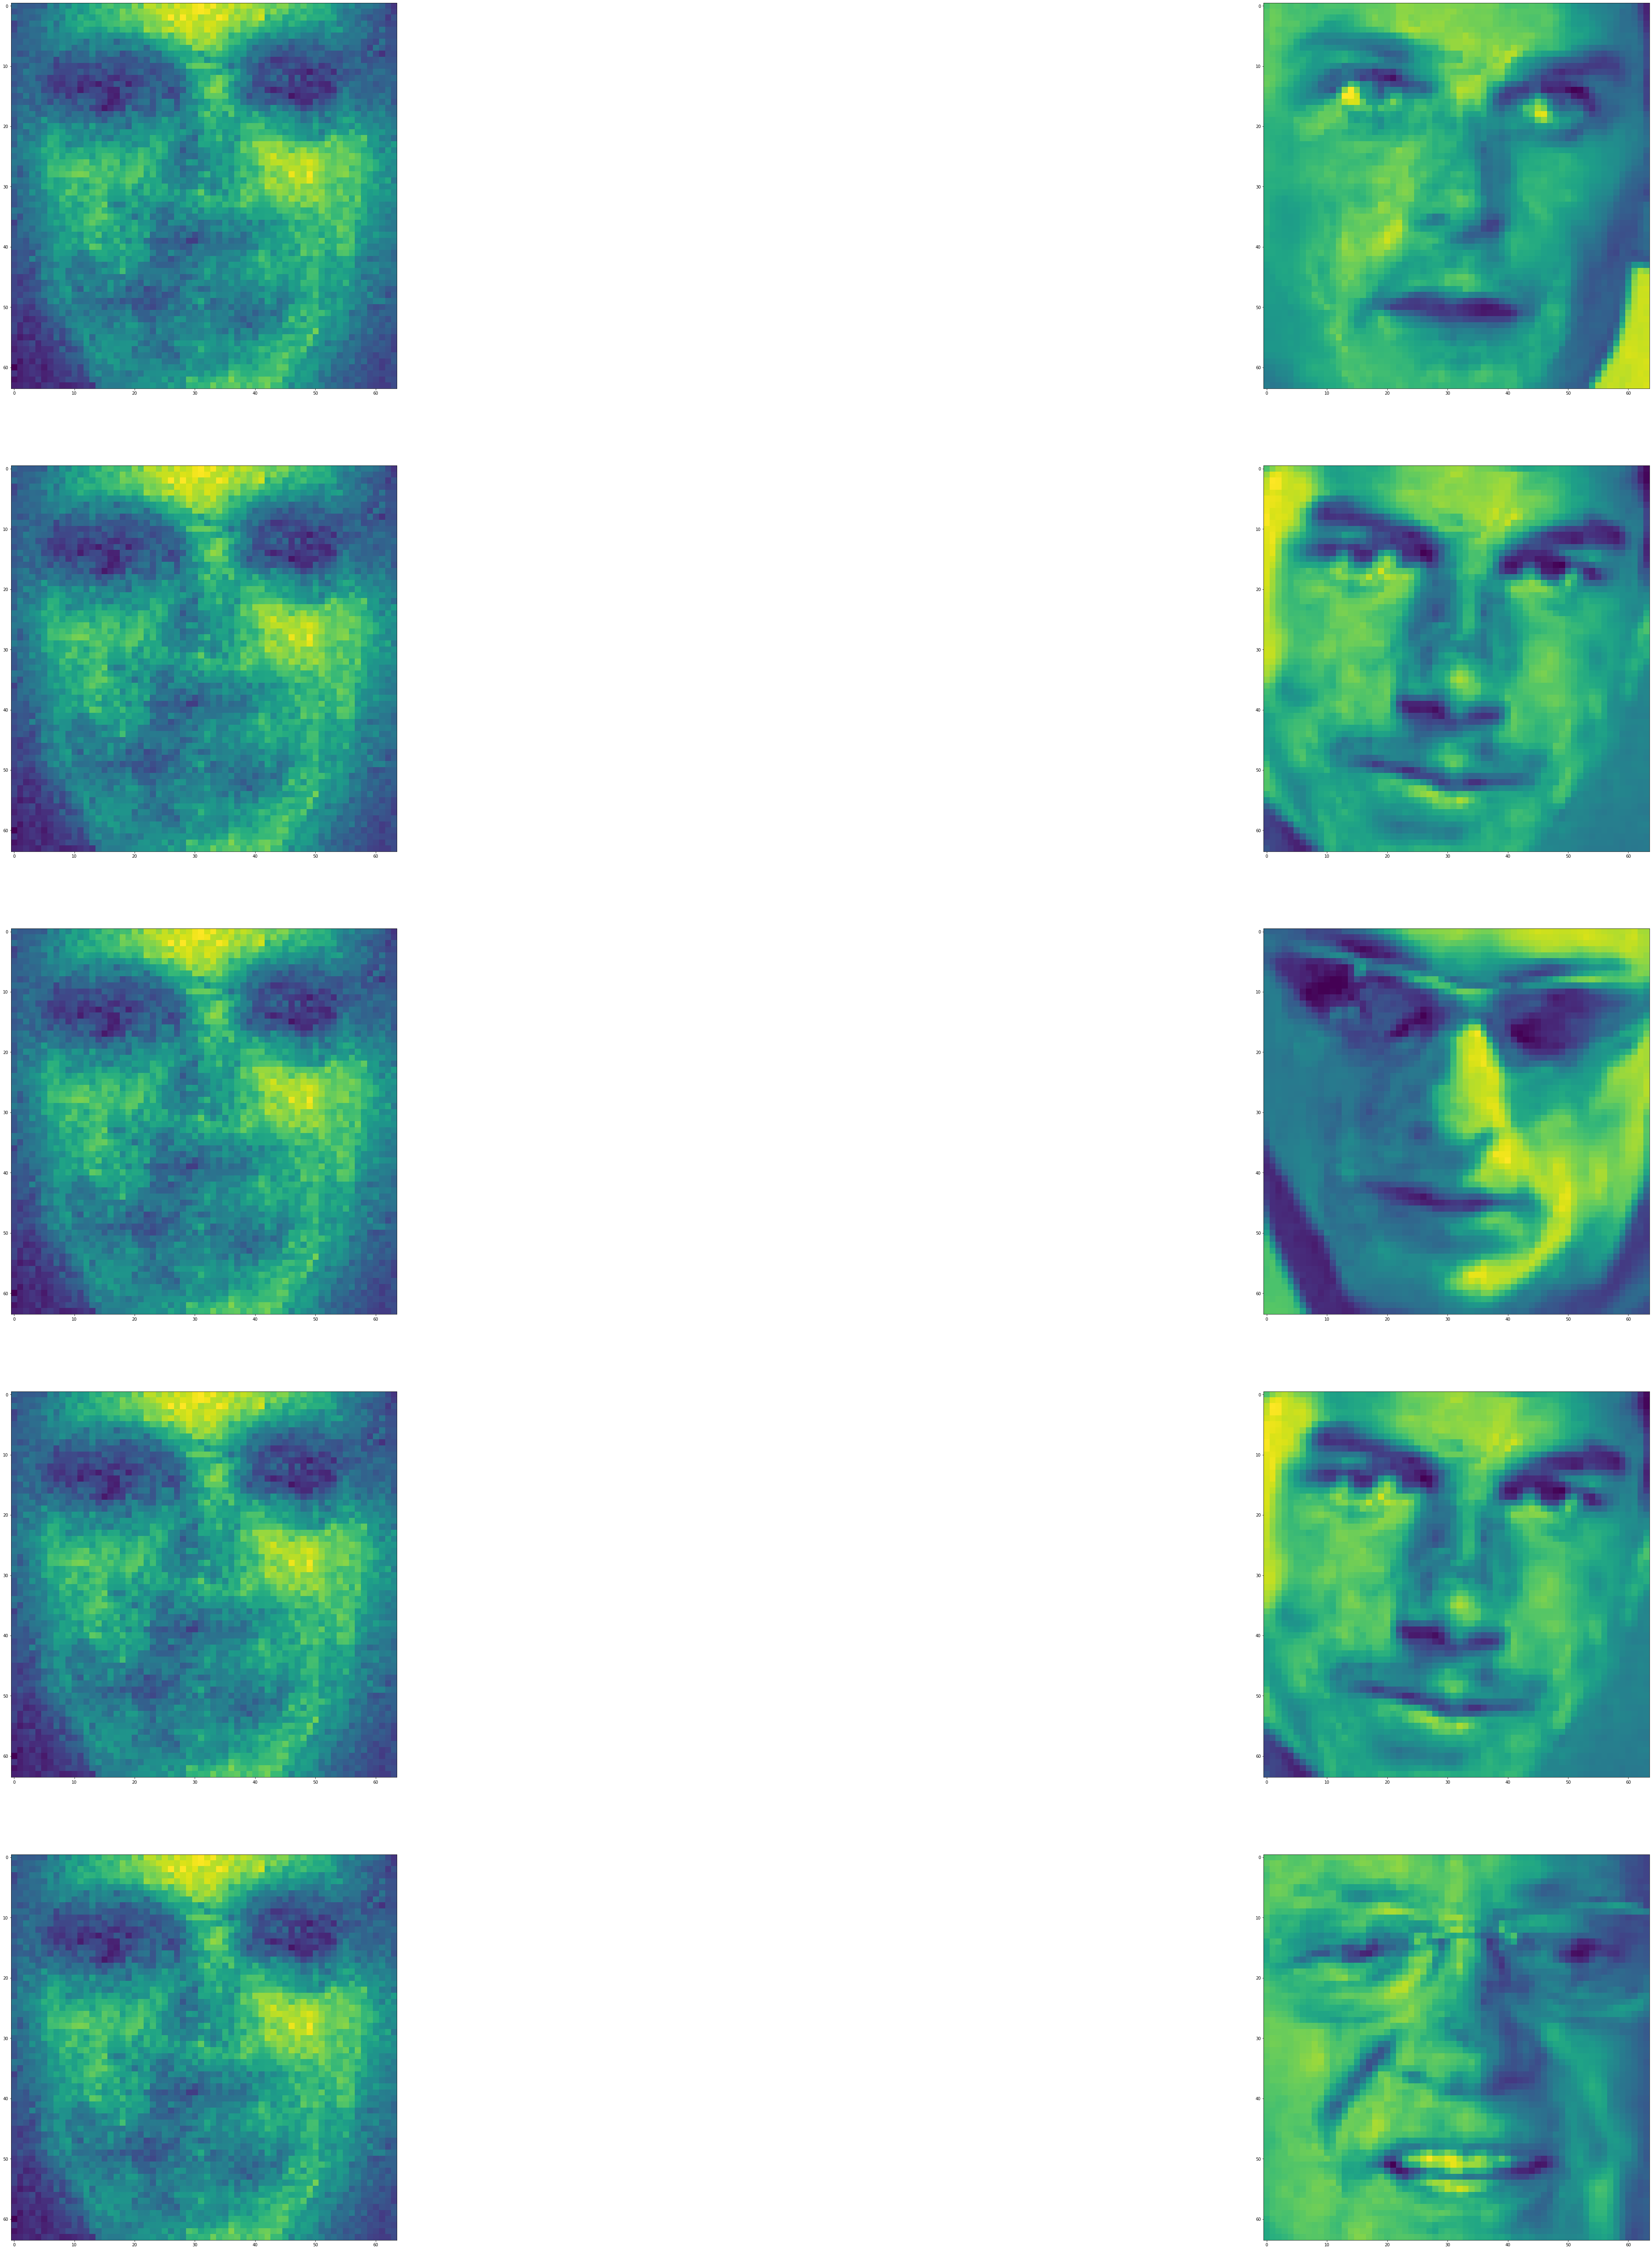

In [32]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.06,n_iter=250,n_components=1500)
rbm.fit(X[:100])
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_
j=0
for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind], (64,64)))
    j = j + 1

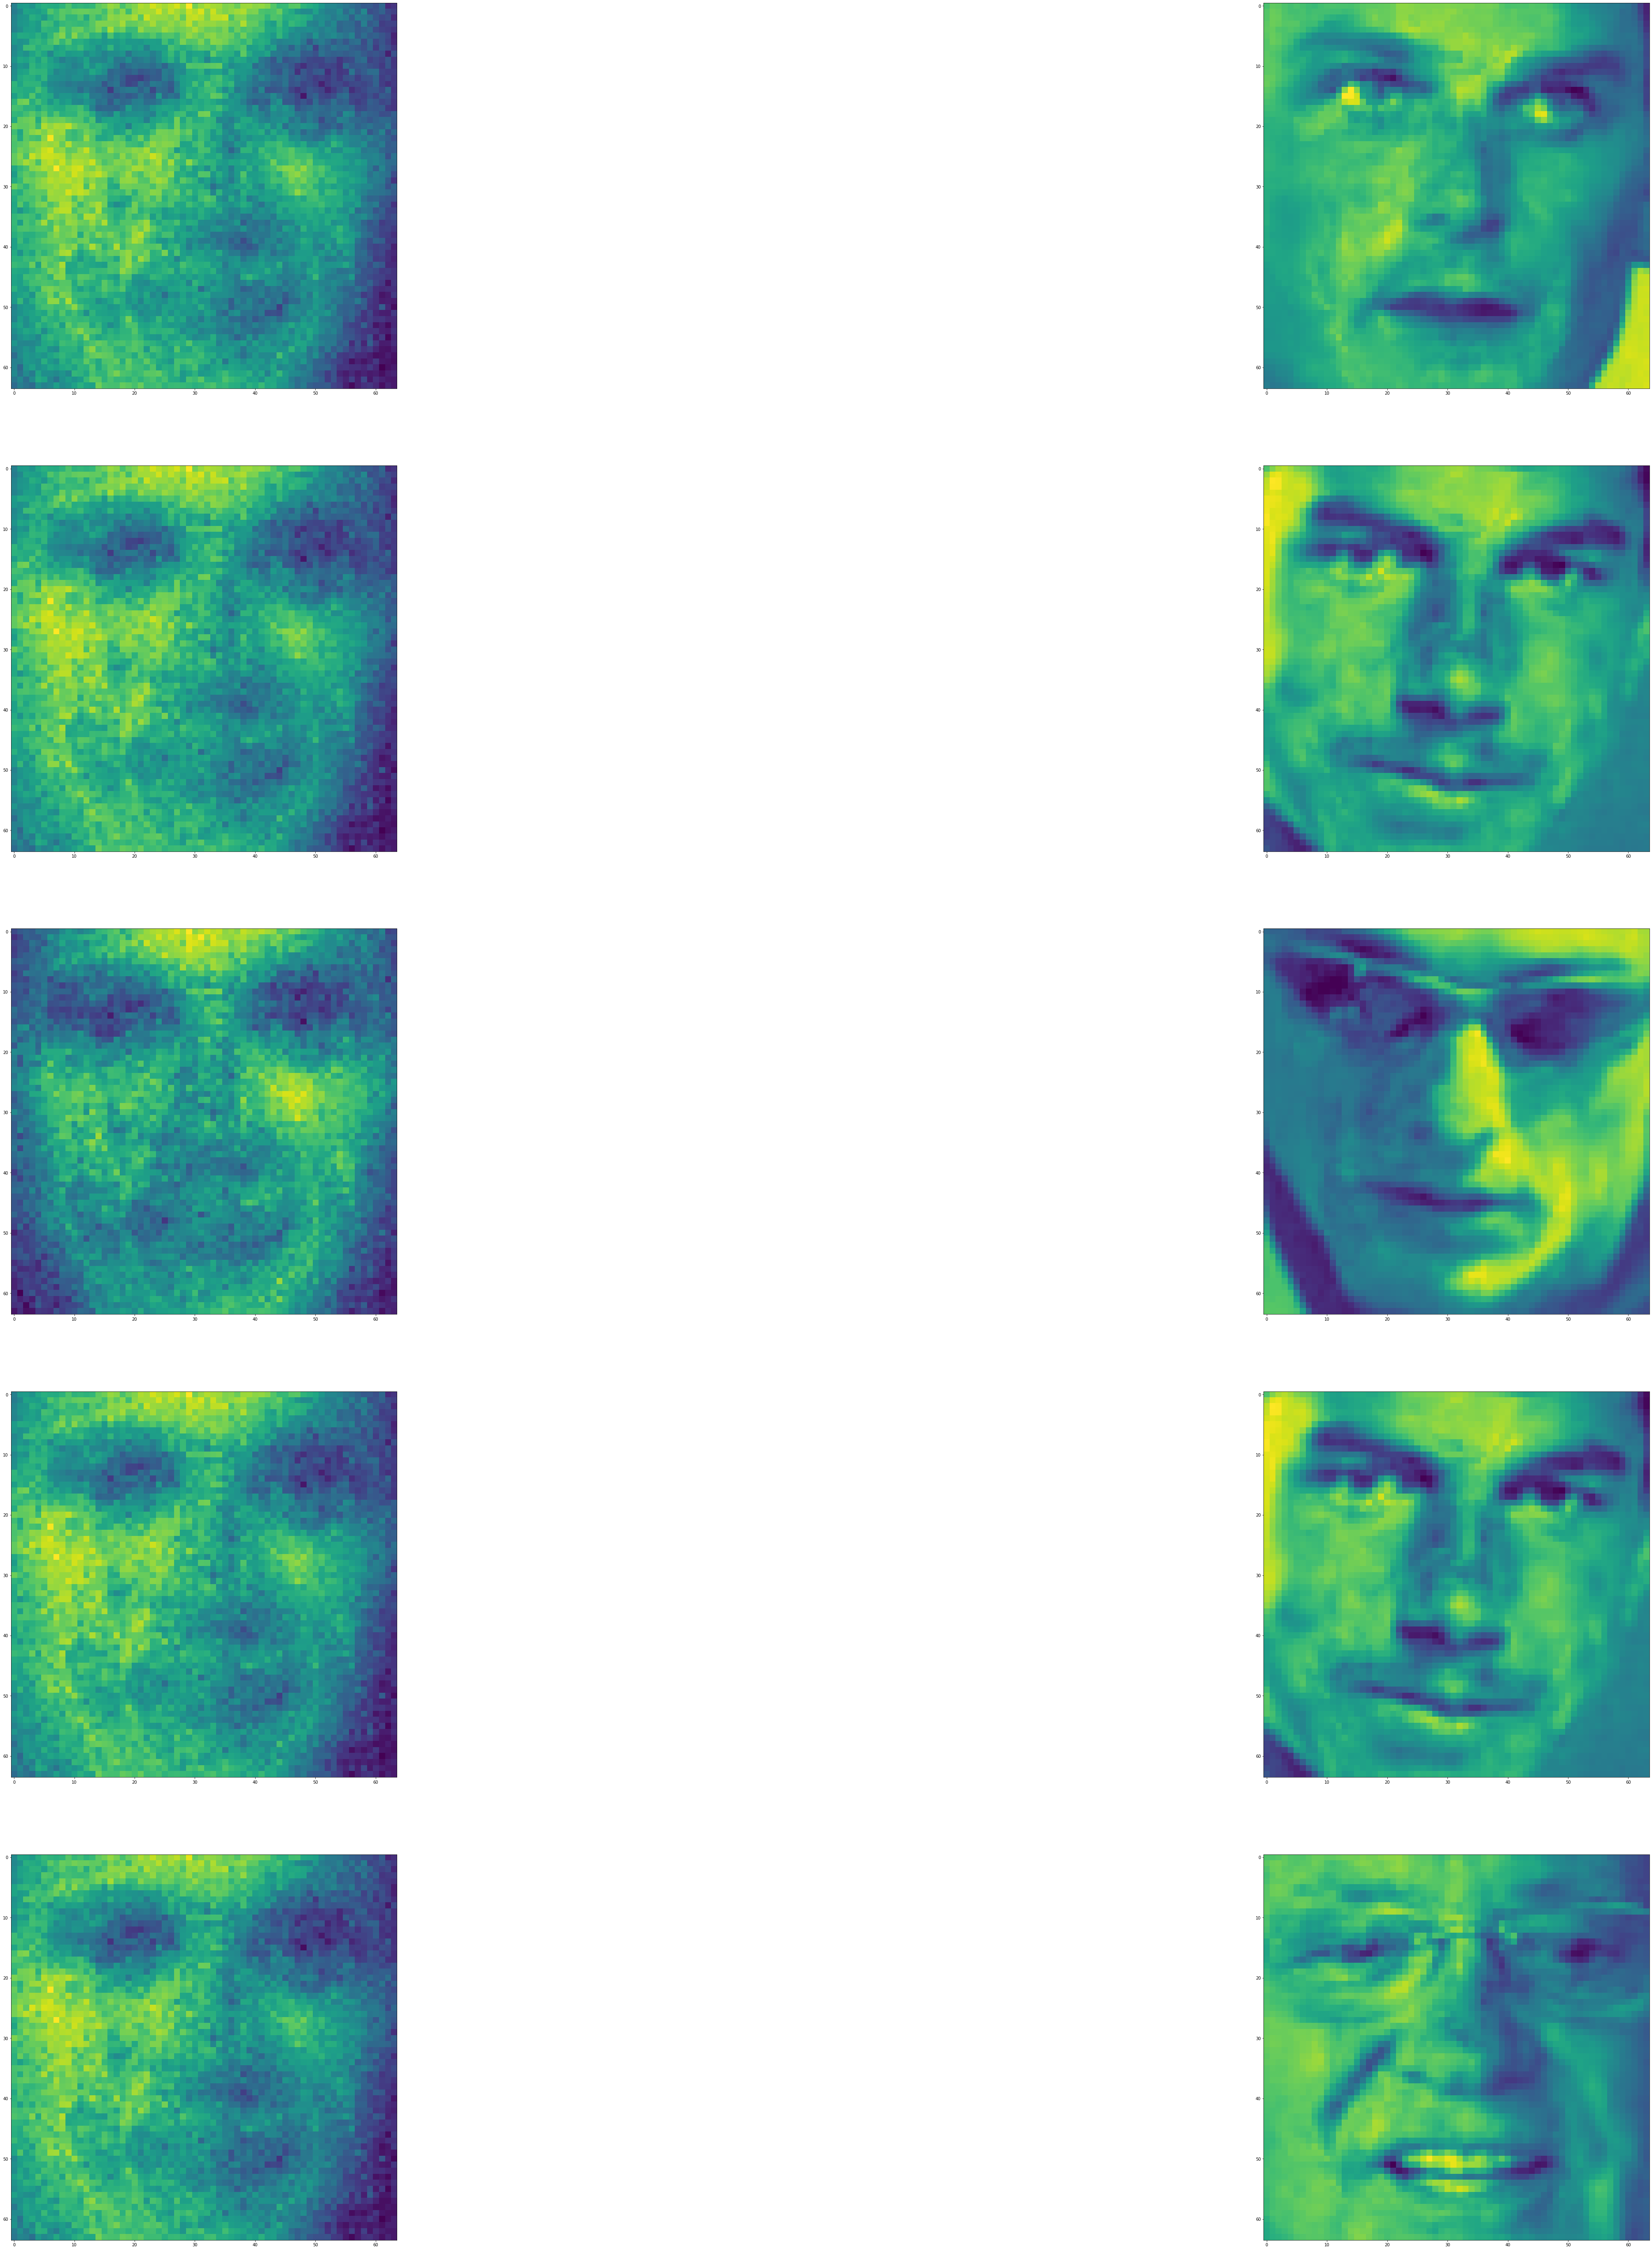

In [20]:
test_indexes = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=rate,n_iter=50,n_components=1000)
rbm.fit(X)
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_

rbm2 = BernoulliRBM(learning_rate=rate,n_iter=50,n_components=1000)
interHV = [(expit(weights.dot(V0) + hidden_biases)) for V0 in X]
rbm2.fit(interHV)
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_

rbm3 = BernoulliRBM(learning_rate=rate,n_iter=50,n_components=1000)
interHV3 = [(expit(weights2.dot(V0) + hidden_biases2)) for V0 in interHV]
rbm3.fit(interHV3)
hidden_biases3 = rbm3.intercept_hidden_
visible_biases3 = rbm3.intercept_visible_
weights3 = rbm3.components_

j=0

for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    
    inter_in = expit(weights2.dot(PHiV0) + hidden_biases2)
    
    #inter_in3 = expit(weights3.dot(inter_in) + hidden_biases3)
    
    #inter_out3 = expit(weights3.T.dot(inter_in3) + visible_biases3)
    
    #inter_out = expit(weights2.T.dot(inter_out3) + visible_biases2)
    
    inter_out = expit(weights2.T.dot(inter_in) + visible_biases2)
    
    PH0Vi = expit(weights.T.dot(inter_out) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind],(64,64)))
    j = j + 1

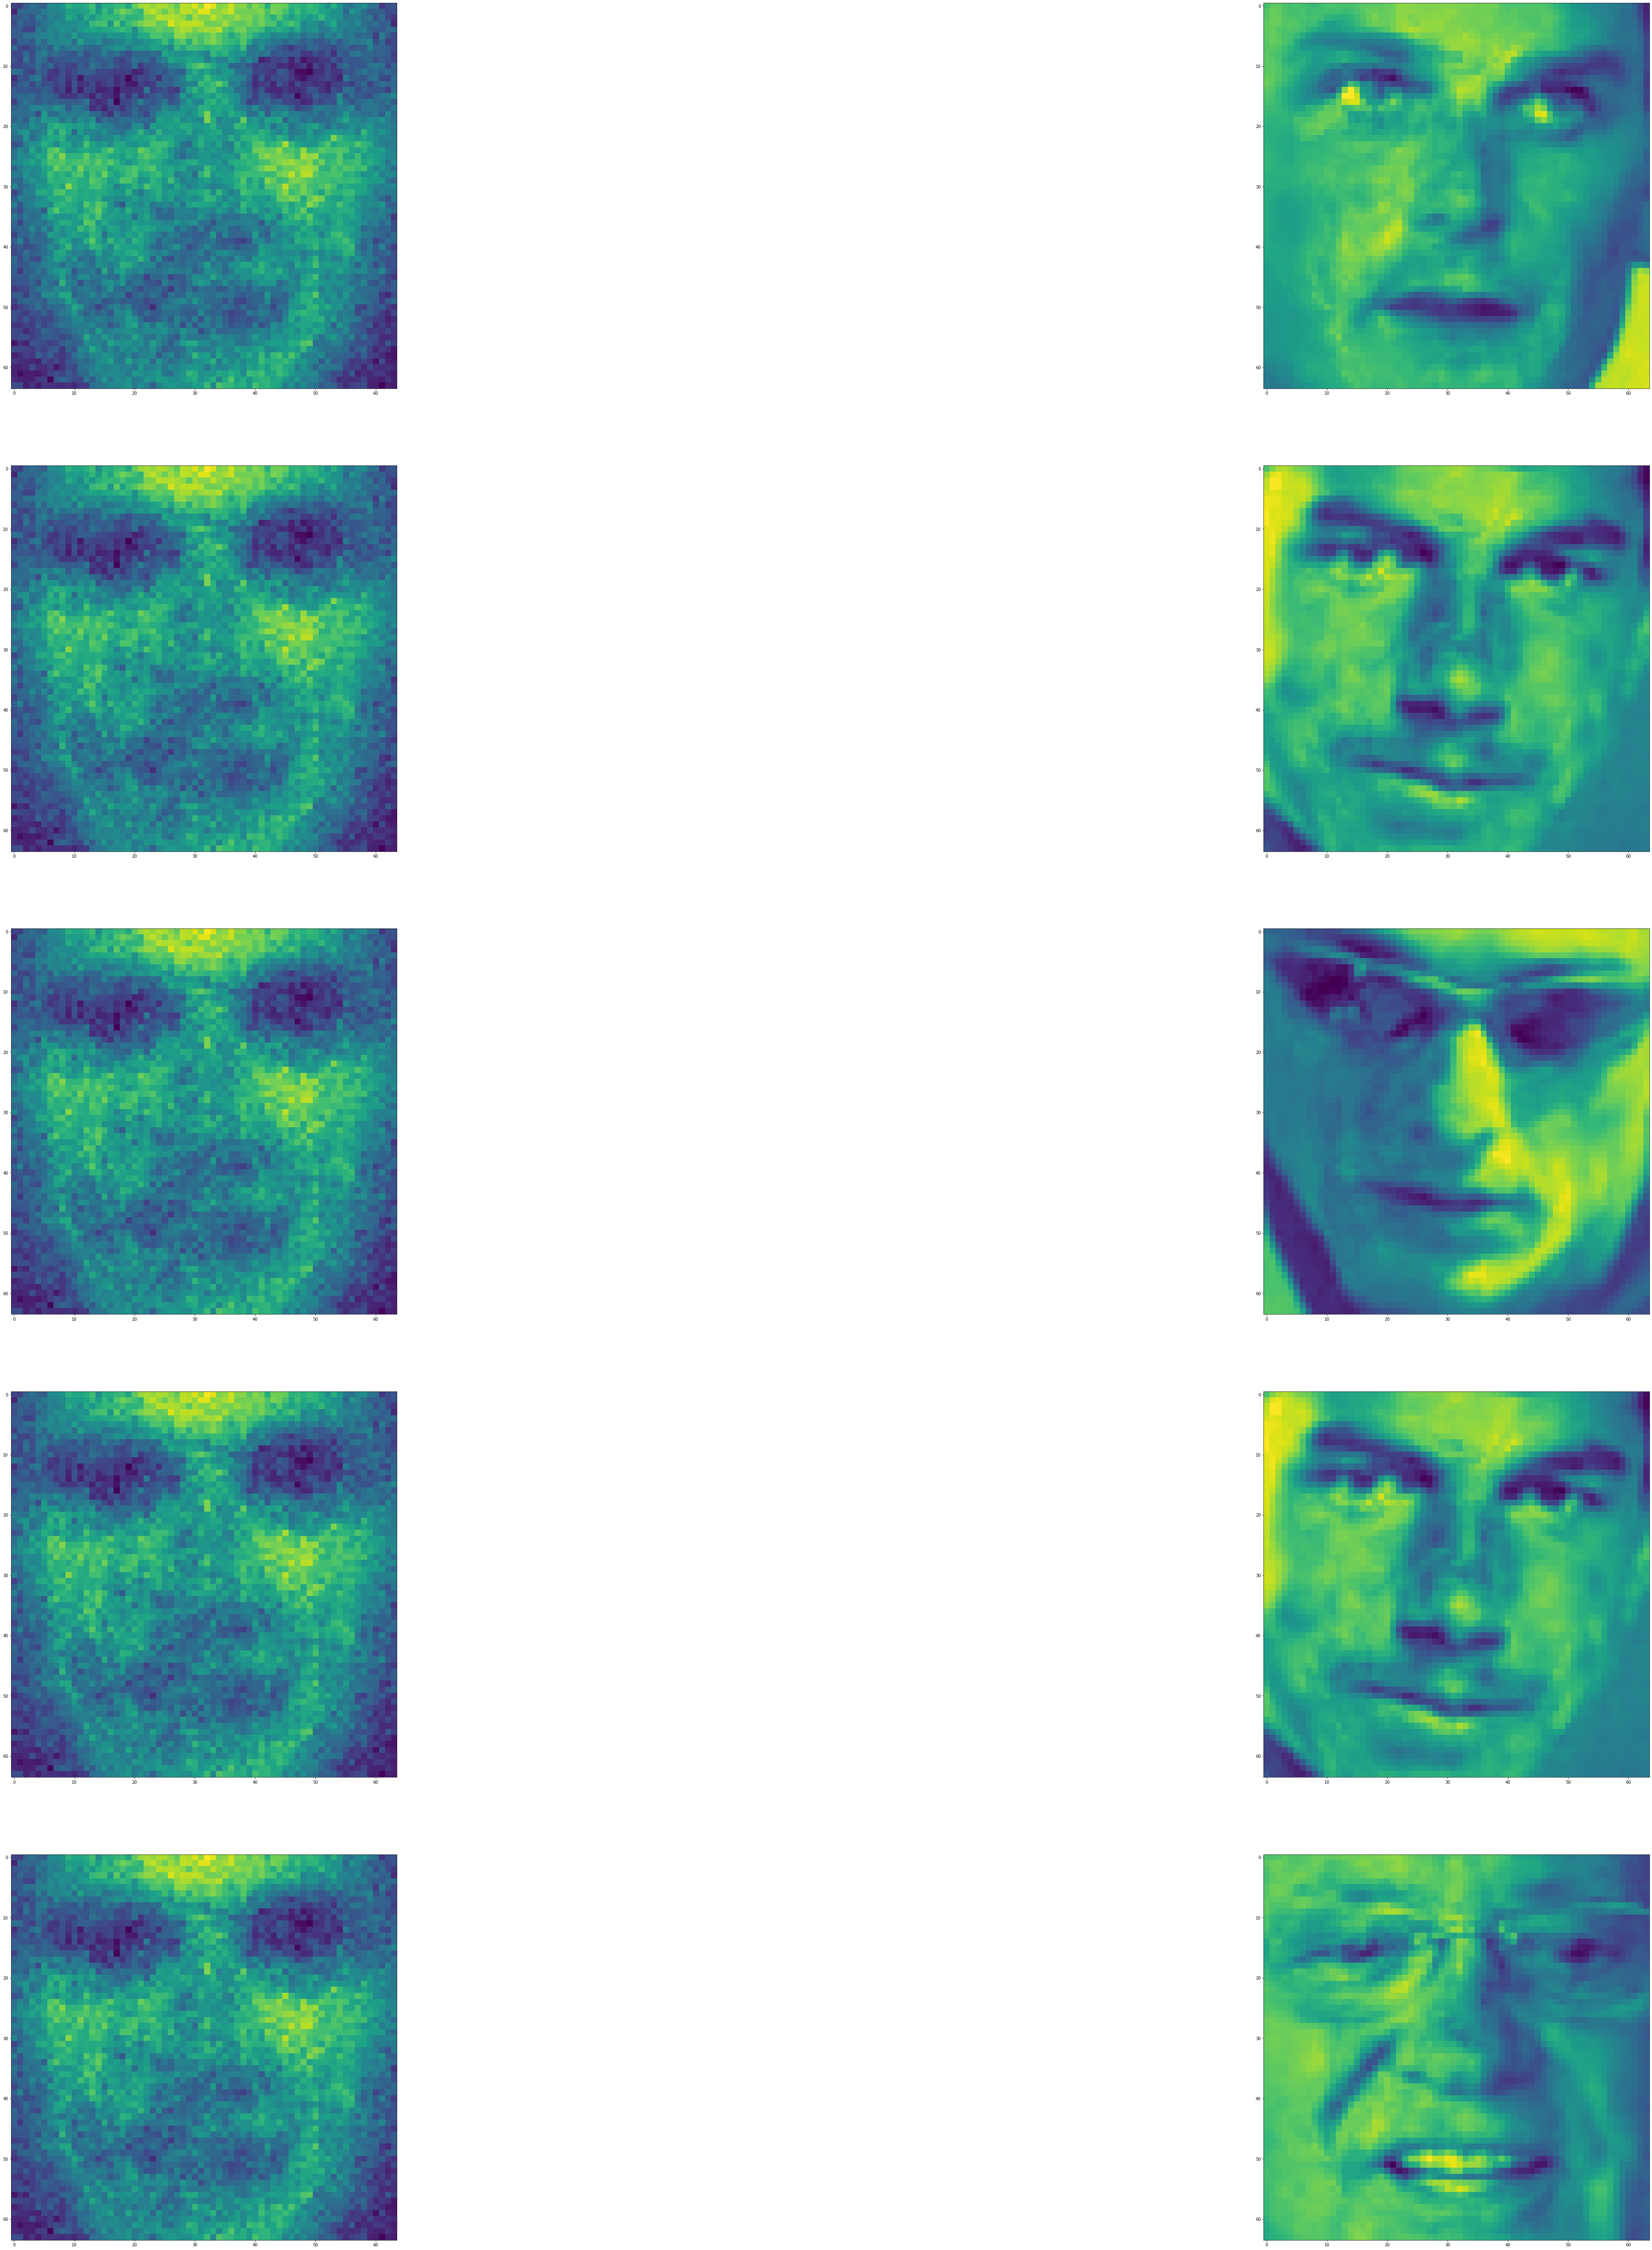

In [23]:
test_indexes = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.09,n_iter=75,n_components=1000)
rbm.fit(X)
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_

rbm2 = BernoulliRBM(learning_rate=rate,n_iter=75,n_components=1500)
interHV = [(expit(weights.dot(V0) + hidden_biases)) for V0 in X]
rbm2.fit(interHV)
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_

rbm3 = BernoulliRBM(learning_rate=rate,n_iter=75,n_components=2000)
interHV3 = [(expit(weights2.dot(V0) + hidden_biases2)) for V0 in interHV]
rbm3.fit(interHV3)
hidden_biases3 = rbm3.intercept_hidden_
visible_biases3 = rbm3.intercept_visible_
weights3 = rbm3.components_

j=0

for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    
    inter_in = expit(weights2.dot(PHiV0) + hidden_biases2)
    
    inter_in3 = expit(weights3.dot(inter_in) + hidden_biases3)
    
    inter_out3 = expit(weights3.T.dot(inter_in3) + visible_biases3)
    
    inter_out = expit(weights2.T.dot(inter_out3) + visible_biases2)
    
    #inter_out = expit(weights2.T.dot(inter_out) + visible_biases2)
    
    PH0Vi = expit(weights.T.dot(inter_out) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind],(64,64)))
    j = j + 1

In [ ]:
test_indexes = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.09,n_iter=75,n_components=1000)
rbm.fit(X)
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_

rbm2 = BernoulliRBM(learning_rate=rate,n_iter=75,n_components=1500)
interHV = [(expit(weights.dot(V0) + hidden_biases)) for V0 in X]
rbm2.fit(interHV)
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_

rbm3 = BernoulliRBM(learning_rate=rate,n_iter=75,n_components=2000)
interHV3 = [(expit(weights2.dot(V0) + hidden_biases2)) for V0 in interHV]
rbm3.fit(interHV3)
hidden_biases3 = rbm3.intercept_hidden_
visible_biases3 = rbm3.intercept_visible_
weights3 = rbm3.components_

j=0

for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    
    inter_in = expit(weights2.dot(PHiV0) + hidden_biases2)
    
    inter_in3 = expit(weights3.dot(inter_in) + hidden_biases3)
    
    inter_out3 = expit(weights3.T.dot(inter_in3) + visible_biases3)
    
    inter_out = expit(weights2.T.dot(inter_out3) + visible_biases2)
    
    #inter_out = expit(weights2.T.dot(inter_out) + visible_biases2)
    
    PH0Vi = expit(weights.T.dot(inter_out) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind],(64,64)))
    j = j + 1

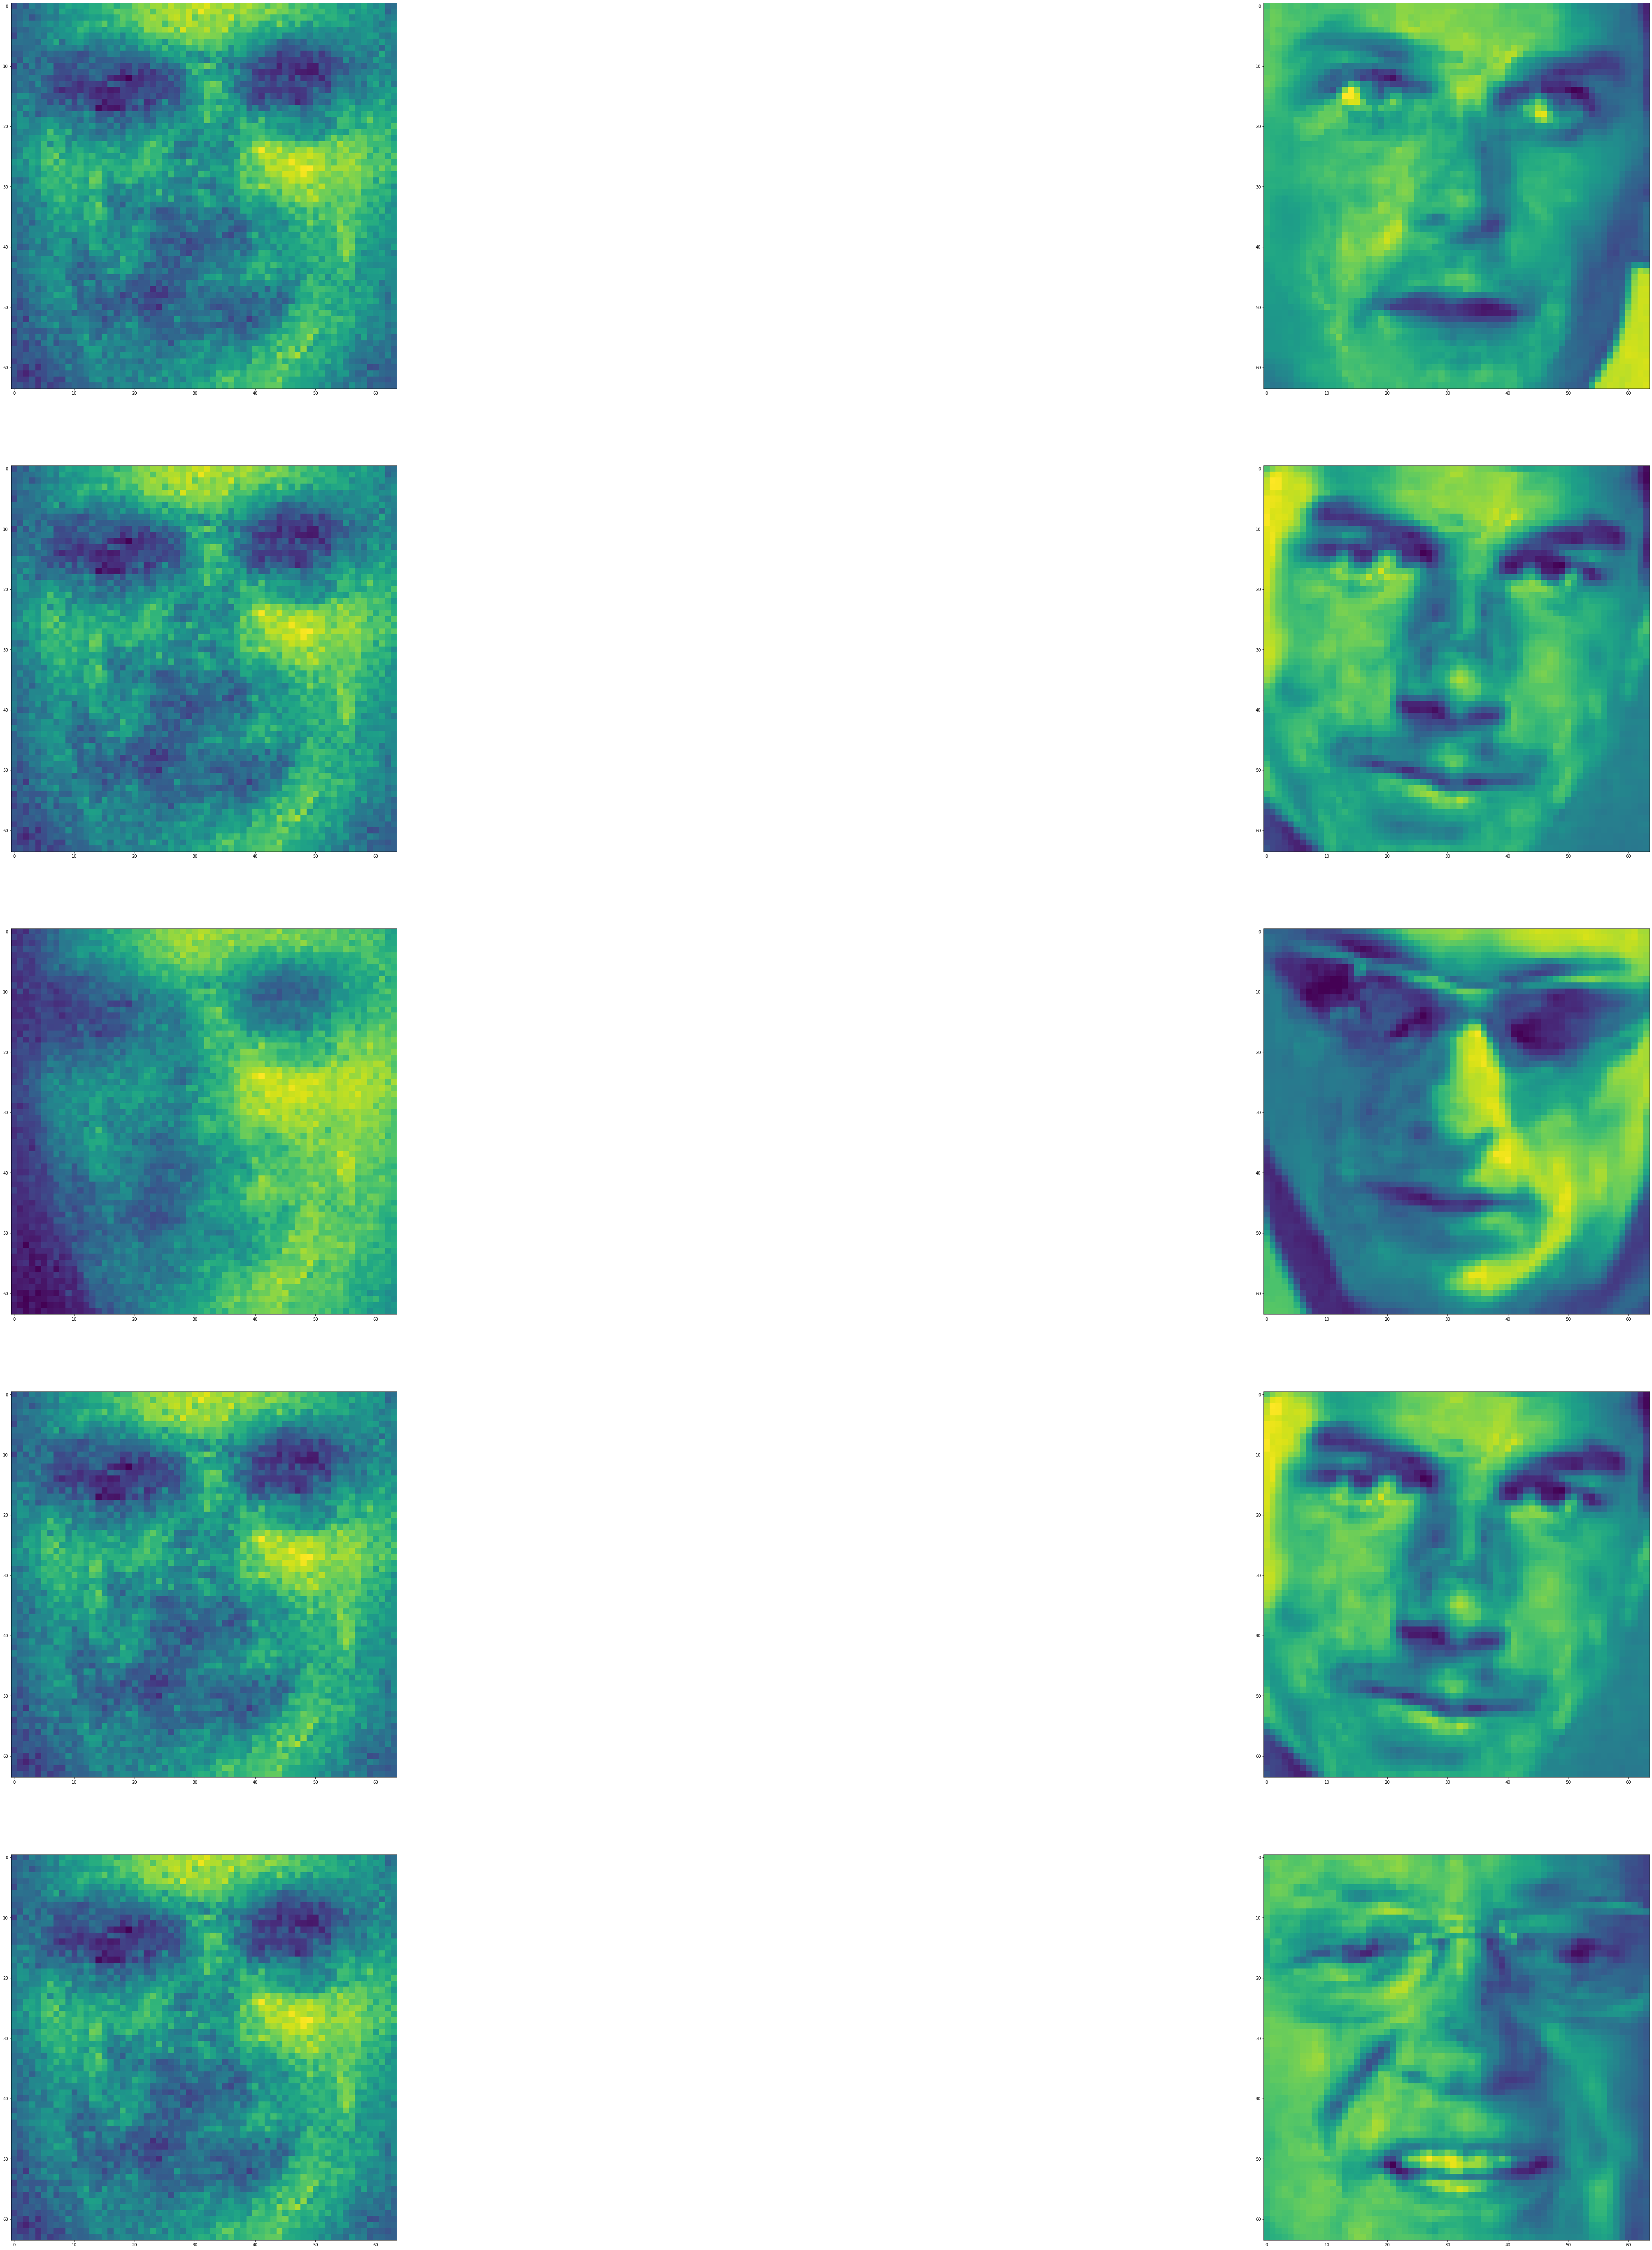

In [45]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))
j=0

rbm = BernoulliRBM(learning_rate=0.06,n_iter=120,n_components=1000)
rbm.fit(X)
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_

rbm2 = BernoulliRBM(learning_rate=0.06,n_iter=120,n_components=1500)
rbm2.fit(X)
hidden_biases2 = rbm2.intercept_hidden_
visible_biases2 = rbm2.intercept_visible_
weights2 = rbm2.components_

rbm = BernoulliRBM(learning_rate=0.06,n_iter=120,n_components=2000)
rbm3.fit(X)
hidden_biases3 = rbm3.intercept_hidden_
visible_biases3 = rbm3.intercept_visible_
weights3 = rbm3.components_



for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    
    PHiV02 = expit(weights2.dot(PH0Vi) + hidden_biases2)
    PH0Vi2 = expit(weights2.T.dot(PHiV02) + visible_biases2)
    
    PHiV03 = expit(weights3.dot(PH0Vi2) + hidden_biases3)
    PH0Vi3 = expit(weights3.T.dot(PHiV03) + visible_biases3)
    
    ax[j][0].imshow(np.reshape(PH0Vi3,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind],(64,64)))
    j = j + 1

In [35]:
print(np.shape(PHiV0))
print(np.shape(PH0Vi))
print(np.shape(PHiV02))
print(np.shape(PH0Vi2))
print(np.shape(PHiV03))
print(np.shape(PH0Vi3))

(1000,)
(4096,)
(1500,)
(4096,)
(2000,)
(4096,)


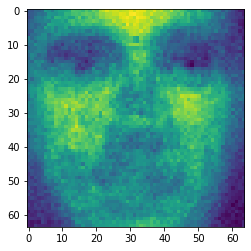

In [36]:
plt.imshow(np.reshape(PH0Vi3,(64,64)))

[0.76954733 0.80672269 0.8        ... 0.94023904 0.94047619 0.95219124]

[0.38985514 0.38728714 0.41028502 ... 0.36986866 0.35418341 0.36932048]
[0.67901235 0.74789916 0.79583333 ... 0.42629482 0.42857143 0.43426295]

[0.38985511 0.38728712 0.41028501 ... 0.36986862 0.35418336 0.36932048]
[0.32921811 0.30252101 0.30416667 ... 0.25099602 0.23015873 0.21912351]

[0.38985432 0.38728648 0.41028462 ... 0.36986777 0.35418222 0.36932041]
[0.67901235 0.74789916 0.79583333 ... 0.42629482 0.42857143 0.43426295]

[0.38985511 0.38728712 0.41028501 ... 0.36986862 0.35418336 0.36932048]
[0.64609053 0.64705882 0.65833333 ... 0.21115538 0.23412698 0.25498008]

[0.38985511 0.38728712 0.41028501 ... 0.36986862 0.35418337 0.36932048]


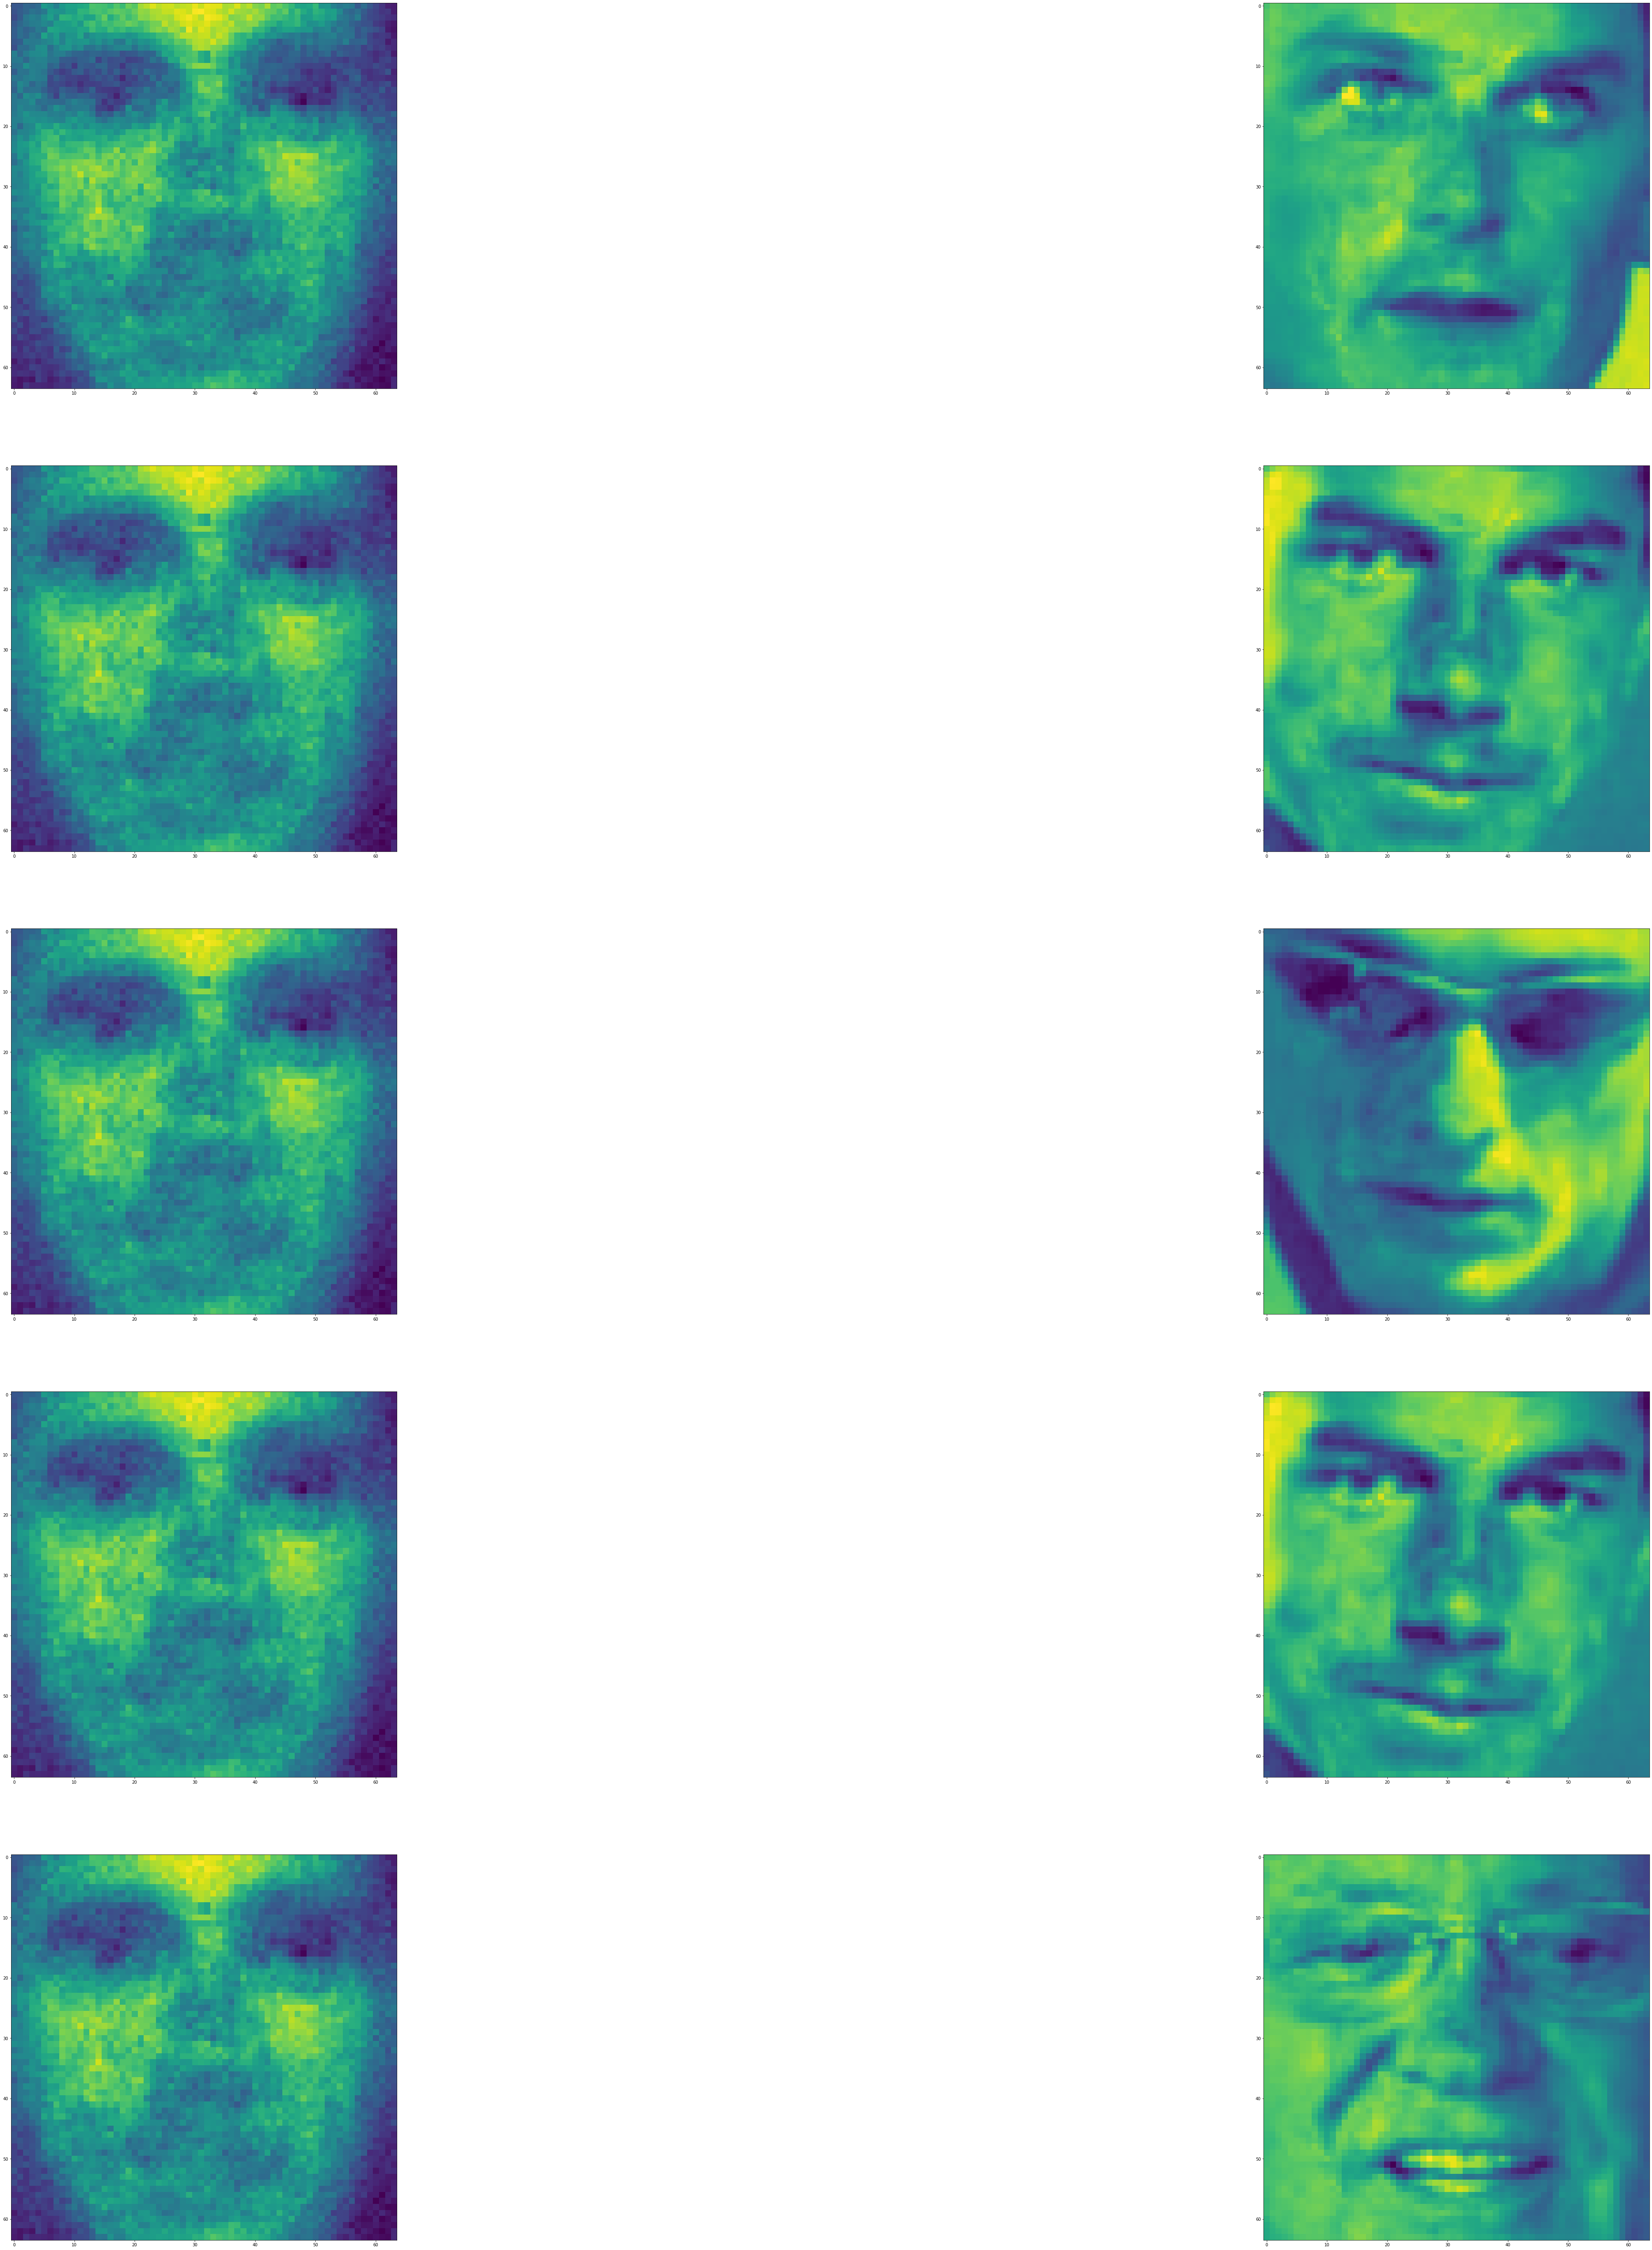

In [43]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))
j=0

for ind in test_indexes:
    V0 = X[ind]
    print(V0)
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    print()
    print(PH0Vi)
    
    PHiV02 = expit(weights2.dot(PH0Vi) + hidden_biases2)
    PH0Vi2 = expit(weights2.T.dot(PHiV02) + visible_biases2)
    
    PHiV03 = expit(weights3.dot(PH0Vi2) + hidden_biases3)
    PH0Vi3 = expit(weights3.T.dot(PHiV03) + visible_biases3)
    
    ax[j][0].imshow(np.reshape(PH0Vi3,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind],(64,64)))
    j = j + 1
    

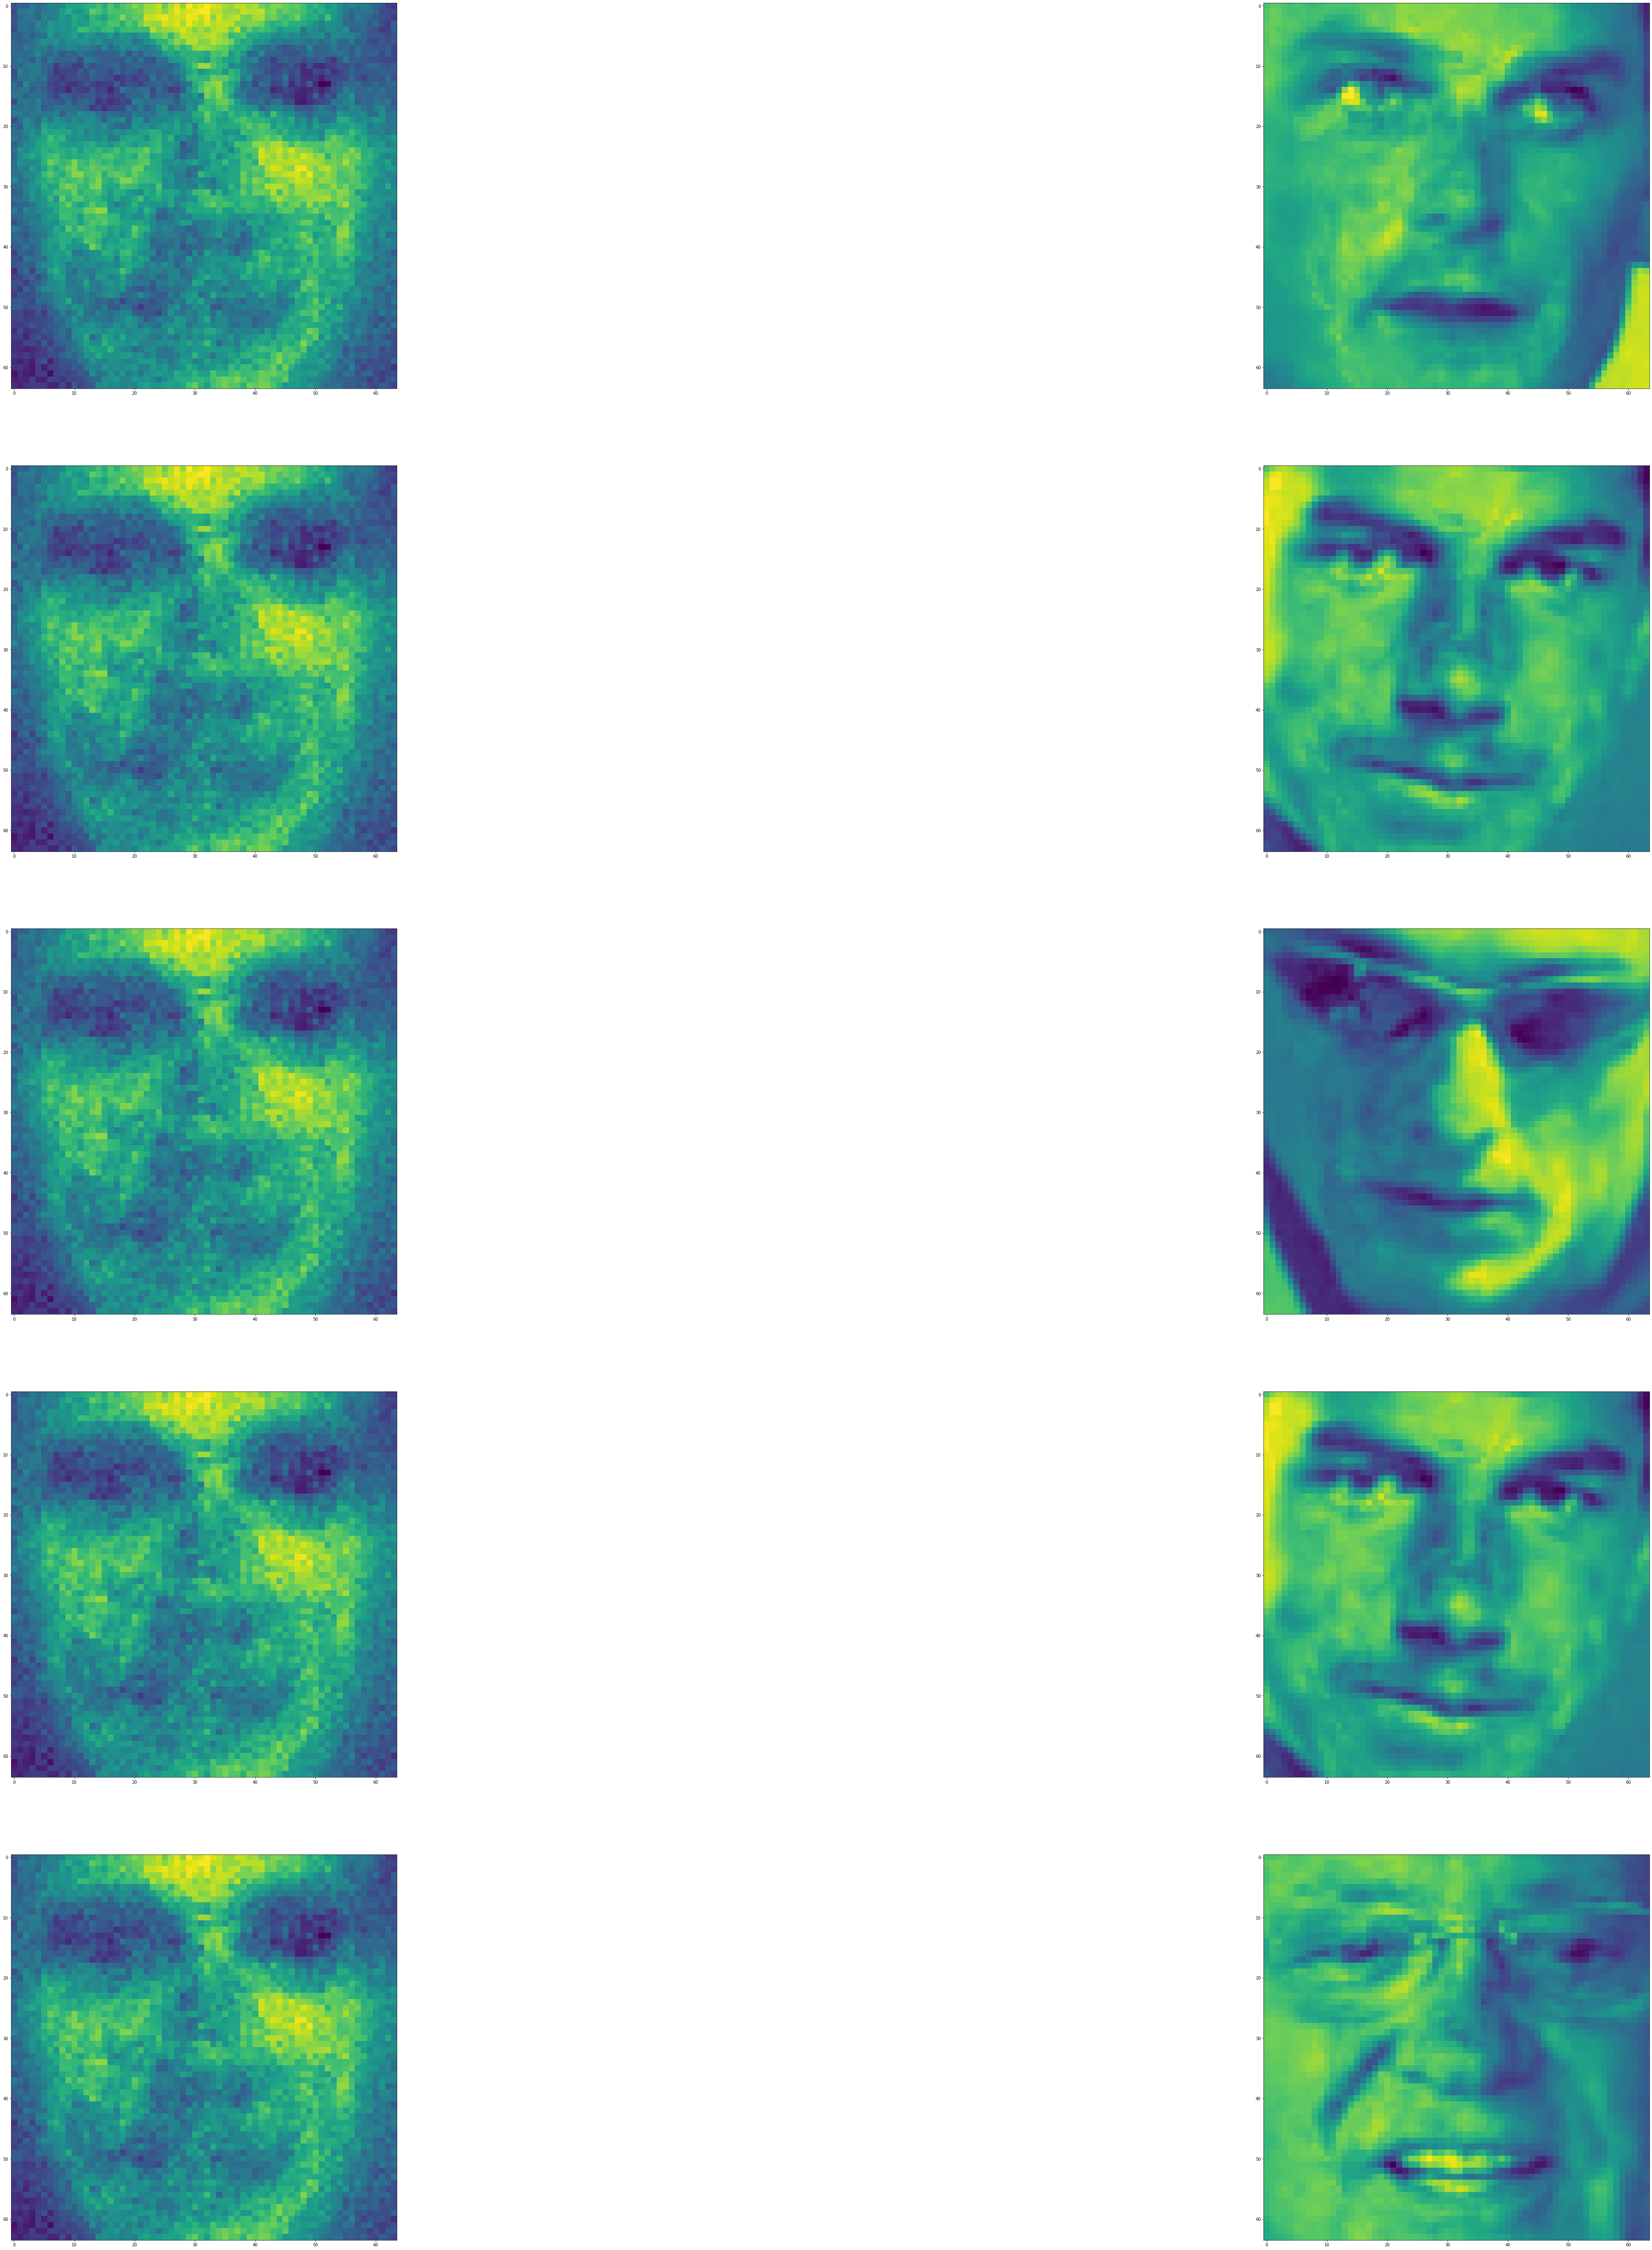

In [46]:
fig, ax = plt.subplots(len(test_indexes), 2, figsize=(100,100))

rbm = BernoulliRBM(learning_rate=0.06,n_iter=300,n_components=1250)
rbm.fit(X[:100])
hidden_biases = rbm.intercept_hidden_
visible_biases = rbm.intercept_visible_
weights = rbm.components_
j=0
for ind in test_indexes:
    V0 = X[ind]
    PHiV0 = expit(weights.dot(V0) + hidden_biases)
    PH0Vi = expit(weights.T.dot(PHiV0) + visible_biases)
    ax[j][0].imshow(np.reshape(PH0Vi,(64,64)))
    ax[j][1].imshow(np.reshape(X[ind], (64,64)))
    j = j + 1